In [84]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [85]:
df=pd.read_csv(r"bank-additional.csv",sep=';')
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [87]:
df.select_dtypes(include='object').head(2)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent,no
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent,no


In [88]:
cols=df.select_dtypes(include='object').columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [89]:
df.select_dtypes(exclude='object').head(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0


In [90]:
df.shape

(4119, 21)

In [91]:
df.size

86499

### Missing Values

In [92]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [93]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4114    False
4115    False
4116    False
4117    False
4118    False
Length: 4119, dtype: bool

### Categorical Data Analysis

In [94]:
job=df['job'].unique()
job_list=[]
for i in job:
    con=df['job']==i
    val=len(df[con])
    job_list.append(val)
job_df=pd.DataFrame(zip(job,job_list),columns=["job","count"])
job_df

,job,count
0,blue-collar,884
1,services,393
2,admin.,1012
3,entrepreneur,148
4,self-employed,159
5,technician,691
6,management,324
7,student,82
8,retired,166
9,housemaid,110


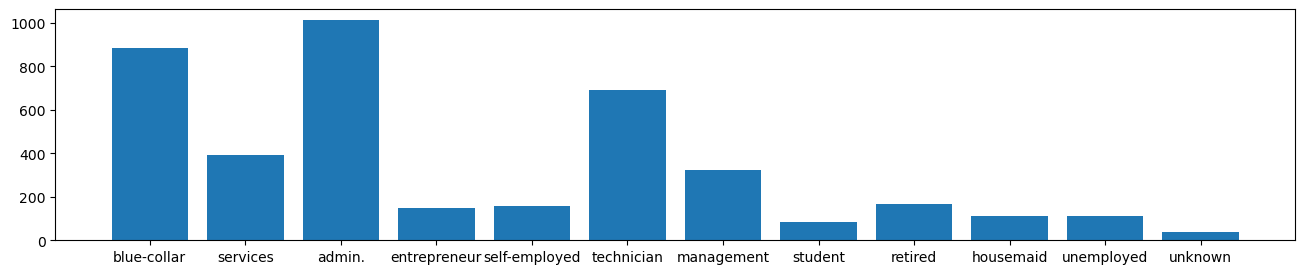

In [95]:
plt.figure(figsize=(16,3))
plt.bar("job","count",data=job_df)
plt.show()

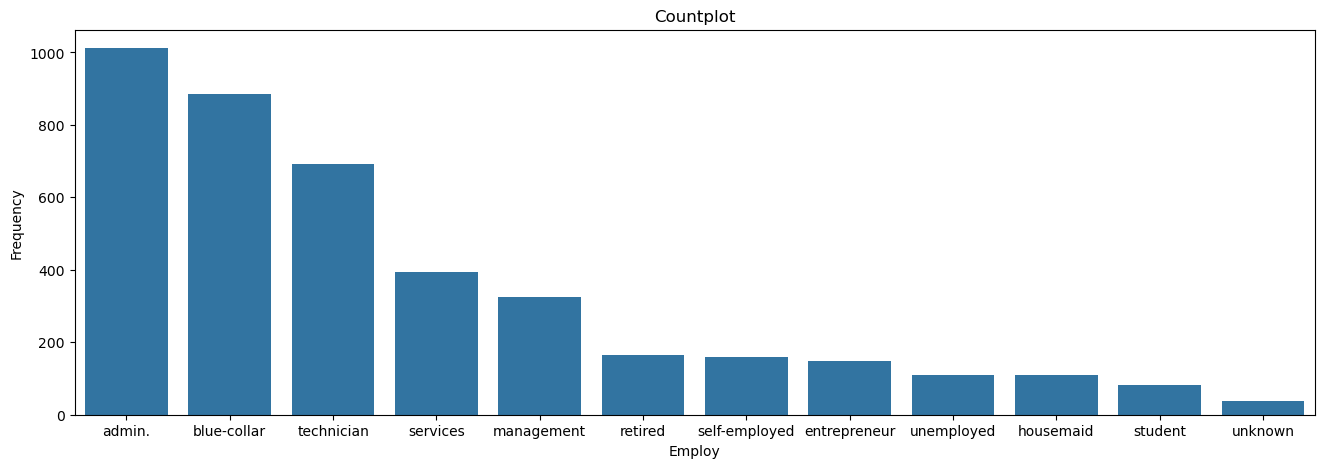

In [96]:
plt.figure(figsize=(16,5))
keys=df['job'].value_counts().keys()
sns.countplot(data=df,x="job",order=keys)
plt.title("Countplot")
plt.xlabel("Employ")
plt.ylabel("Frequency")
plt.show()

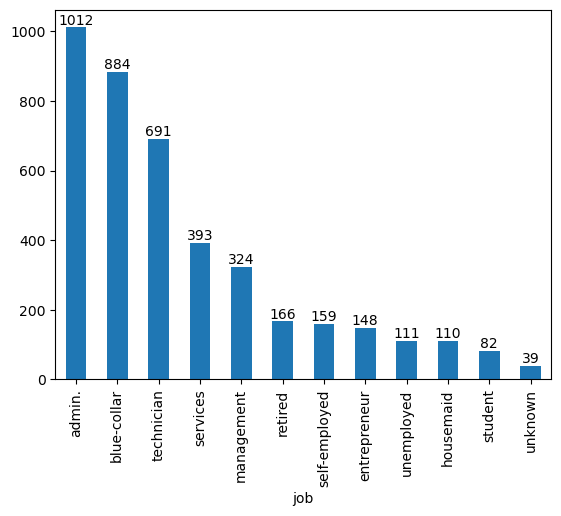

In [97]:
ax=df['job'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

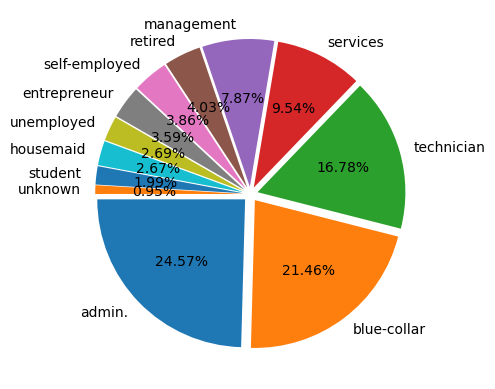

In [98]:
keys=df['job'].value_counts().keys()
values=df['job'].value_counts().values
plt.pie(values,explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],labels=keys,autopct="%0.2f%%",startangle=180,radius=1)
plt.show()        

In [99]:
df['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [100]:
df['education'].value_counts()

education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: count, dtype: int64

In [101]:
study=df['education'].unique()
study_list=[]
for i in study:
    con=df['education']==i
    val=len(df[con])
    study_list.append(val)
study_list

[574, 921, 1264, 535, 228, 429, 167, 1]

In [102]:
education_df=pd.DataFrame(zip(study,study_list),
                          columns=['Education','Count'])
education_df

,Education,Count
0,basic.9y,574
1,high.school,921
2,university.degree,1264
3,professional.course,535
4,basic.6y,228
5,basic.4y,429
6,unknown,167
7,illiterate,1


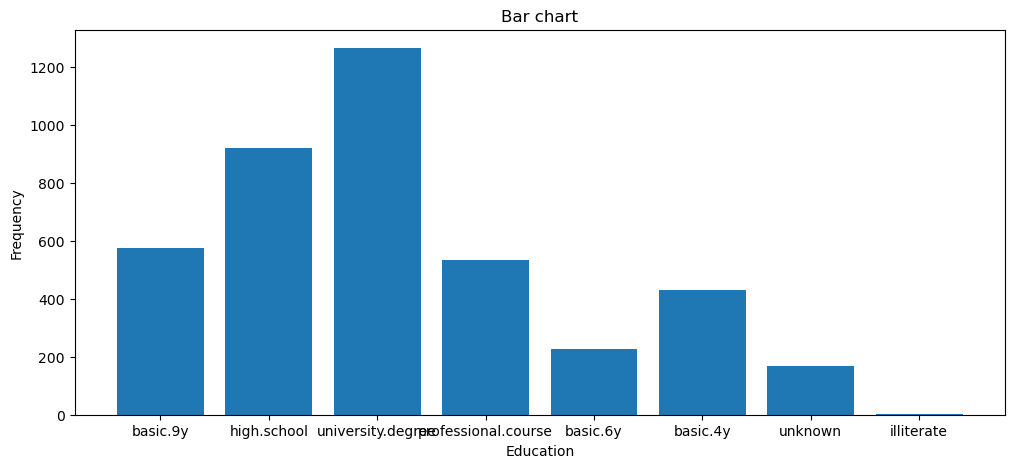

In [103]:
plt.figure(figsize=(12,5))
plt.bar("Education","Count",data=education_df)
plt.title("Bar chart")
plt.xlabel("Education")
plt.ylabel("Frequency")
plt.show()

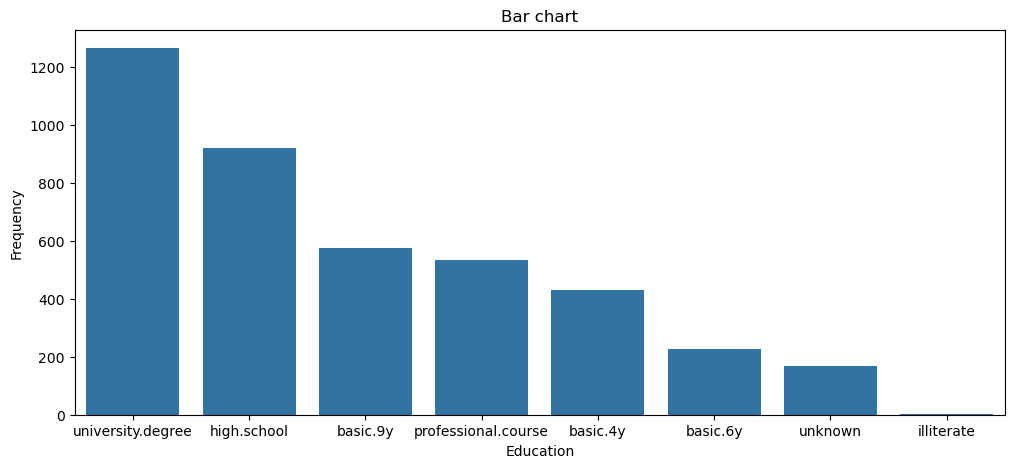

In [104]:
plt.figure(figsize=(12,5))
keys=df['education'].value_counts().keys()
sns.countplot(data=df,x="education",order=keys)
plt.title("Bar chart")
plt.xlabel("Education")
plt.ylabel("Frequency")
plt.show()

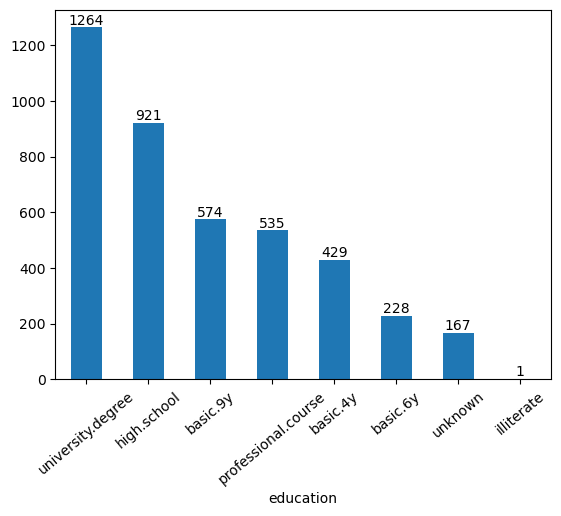

In [105]:
ax=df['education'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=40)
plt.show()

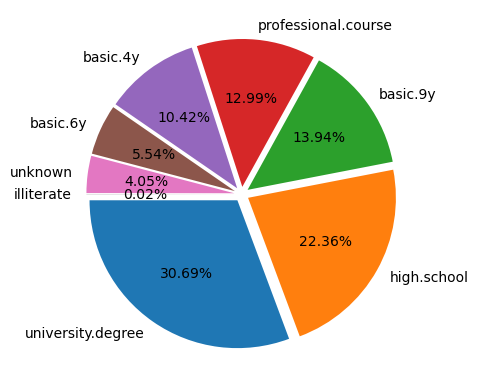

In [106]:
keys=df['education'].value_counts().keys()
values=df['education'].value_counts().values
plt.pie(values,explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],labels=keys,autopct="%0.2f%%",startangle=180,radius=1)
plt.show()

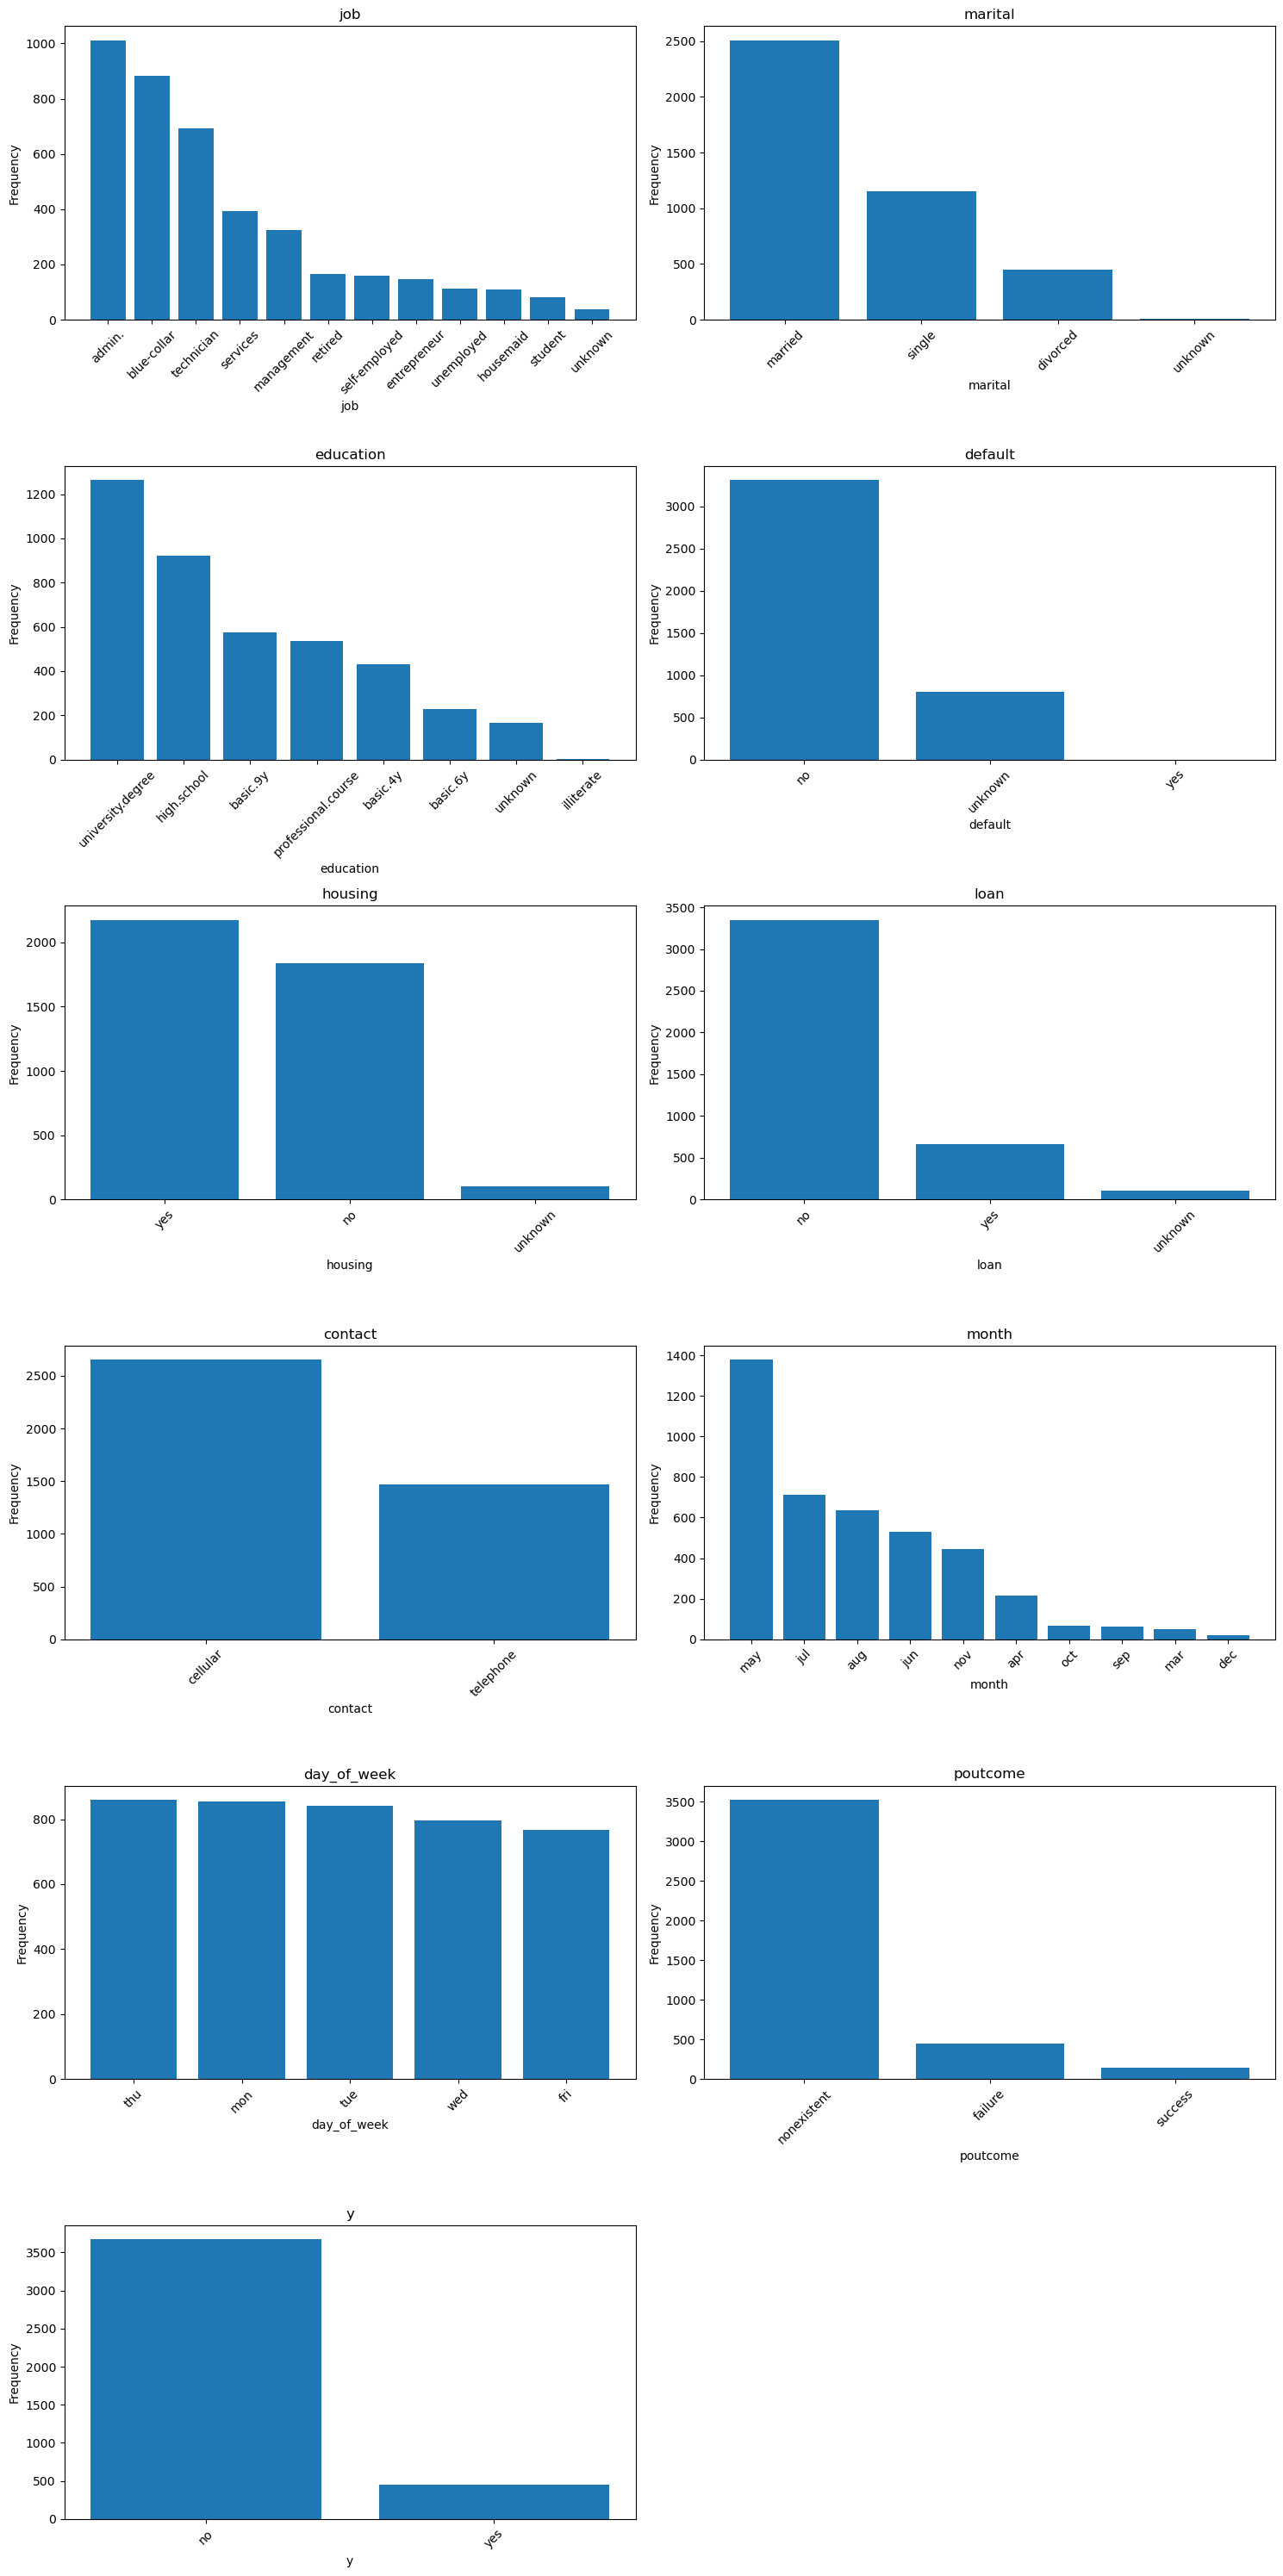

In [107]:
plt.figure(figsize=(15,30))
for i,j in enumerate(cols,1):
    plt.subplot(6,2,i)
    c_count=df[j].value_counts()
    plt.bar(c_count.index,c_count.values)
    plt.title(j)
    plt.xlabel(j)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()    
plt.show()

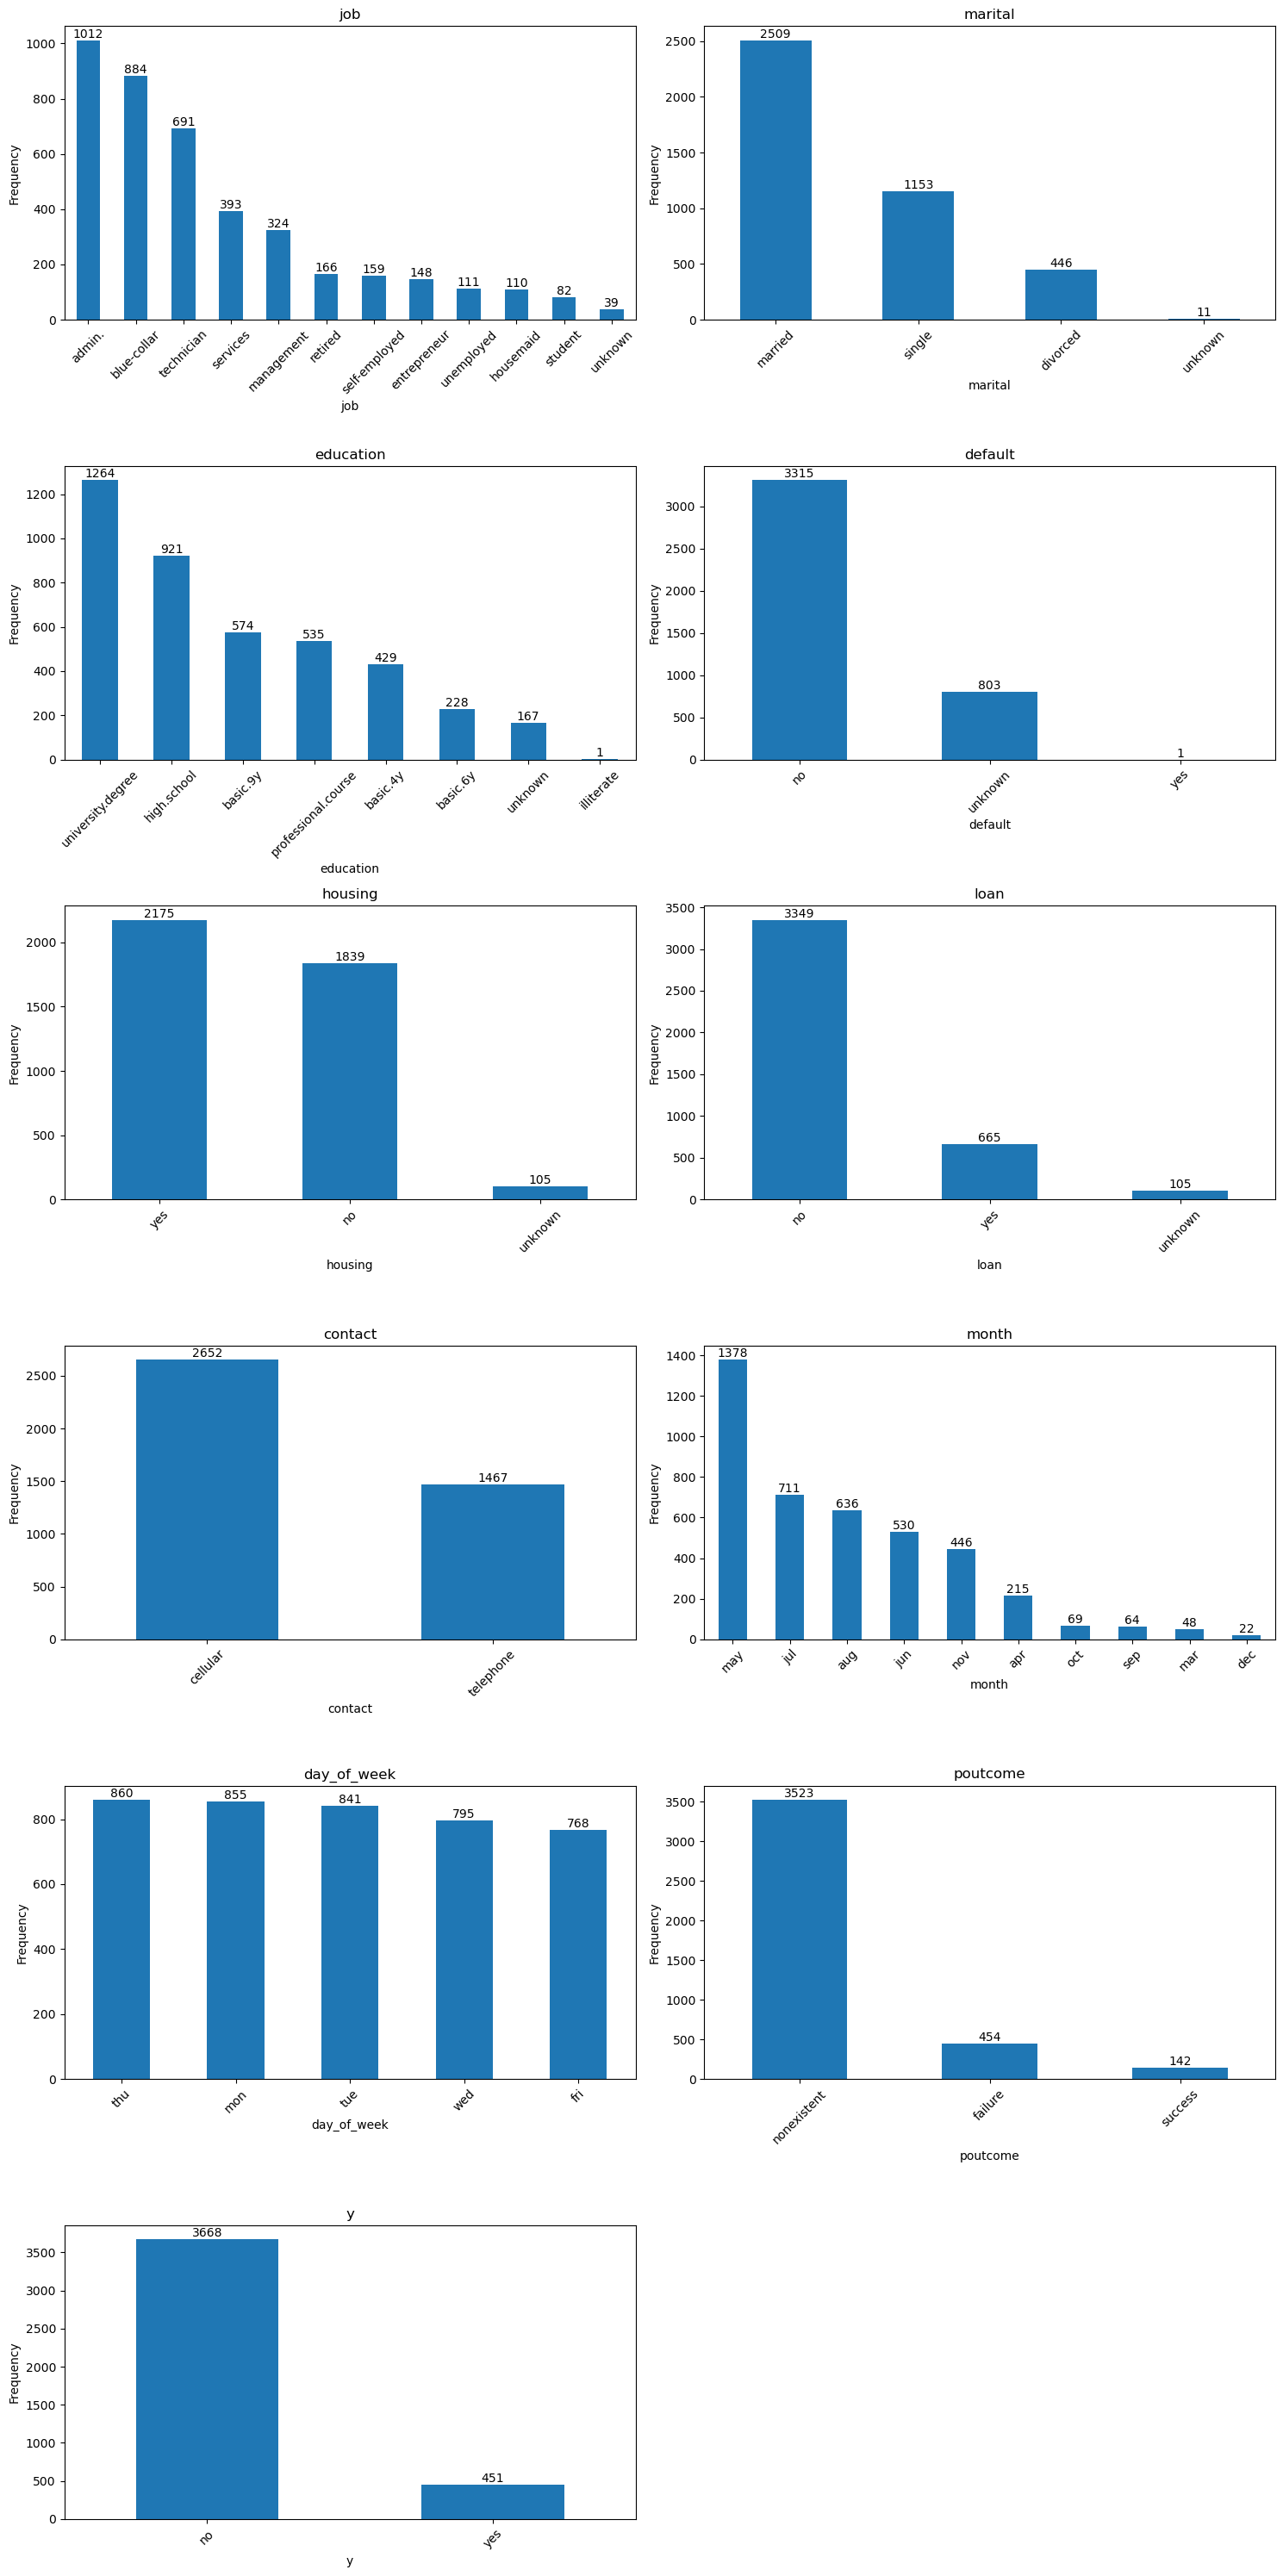

In [108]:
plt.figure(figsize=(15,30))
for i,j in enumerate(cols,1):
    plt.subplot(6,2,i)
    
    ax=df[j].value_counts().plot(kind='bar')
    ax.bar_label(ax.containers[0])
    plt.title(j)
    plt.xlabel(j)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()    
plt.show()

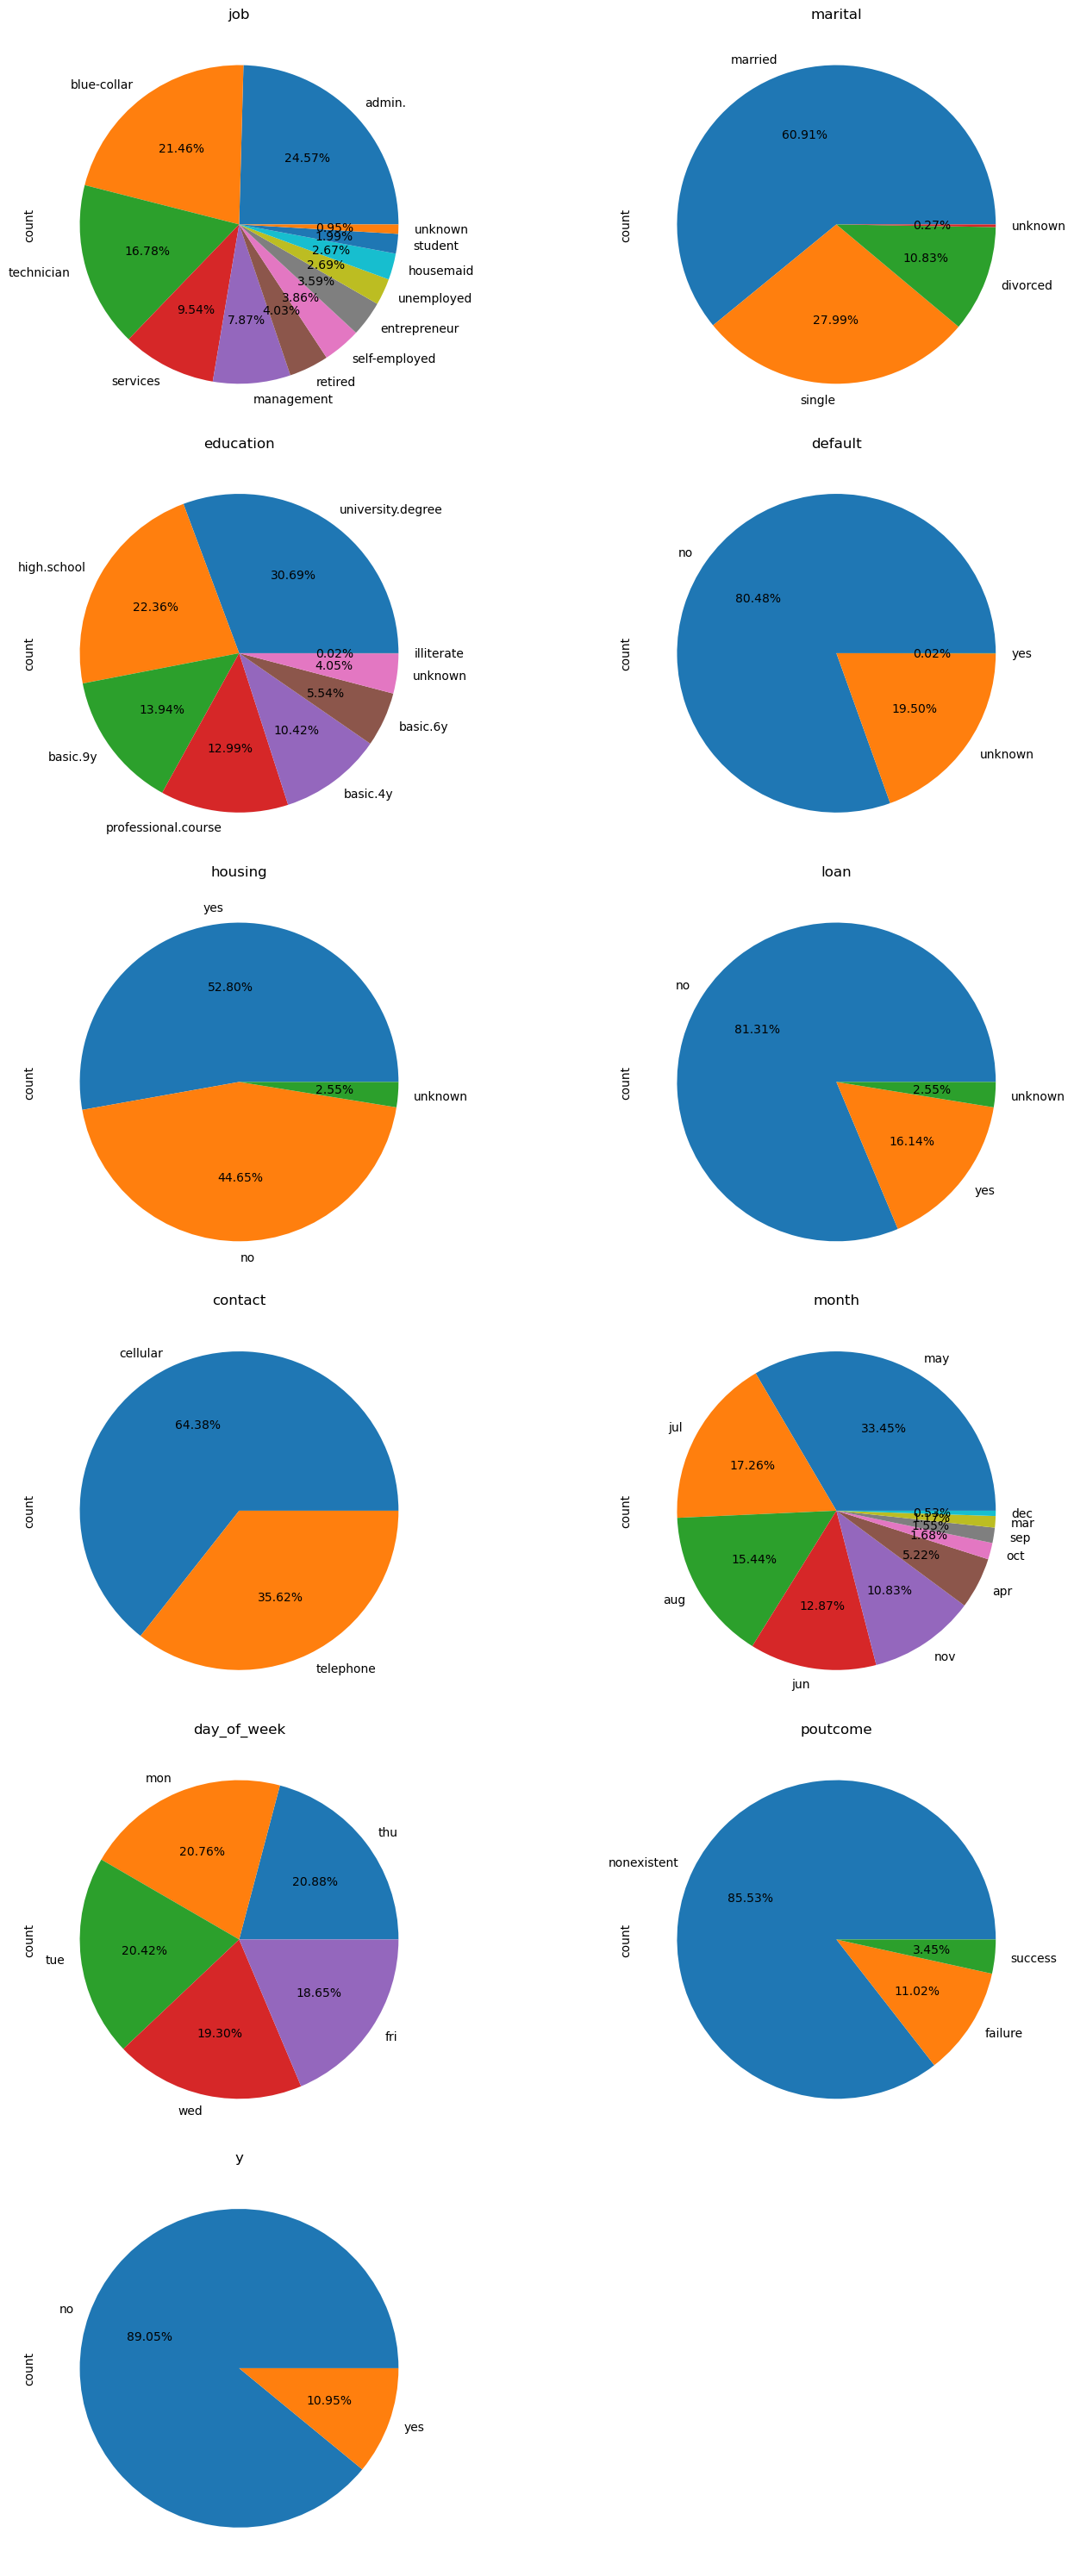

In [109]:
plt.figure(figsize=(15,30))
for i,j in enumerate(cols,1):
    plt.subplot(6,2,i)
    df[j].value_counts().plot(kind='pie',autopct="%0.2f%%",radius=1,)
    
    plt.title(j)
plt.tight_layout()    
plt.show()

### Cross Tab                                                                                                          m

In [110]:
col1=df['job']
col3=df['marital']

result=pd.crosstab(col1,col3)
result

marital,divorced,married,single,unknown
job,,,,
admin.,112,513,384,3
blue-collar,66,634,183,1
entrepreneur,22,107,19,0
housemaid,18,77,15,0
management,42,233,49,0
retired,31,121,11,3
self-employed,16,94,48,1
services,48,244,100,1
student,0,3,79,0


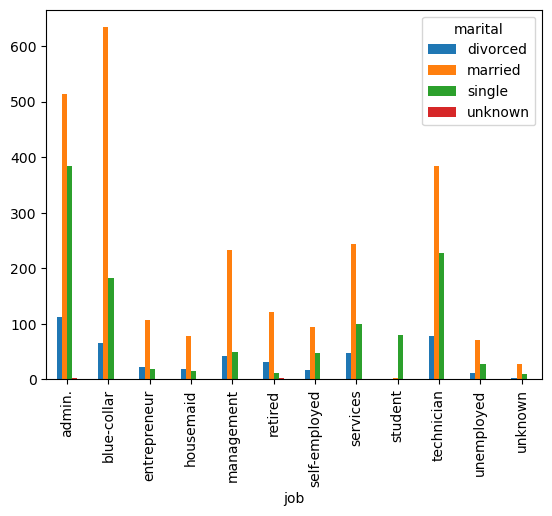

In [111]:
result.plot(kind='bar')
plt.show()

## Numerical Data Analysis

In [112]:
cols1=df.select_dtypes(exclude='object').columns
cols1

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [113]:
l1=[]
cols1=df.select_dtypes(exclude='object').columns
for i in cols1:
    countt=round(len(df[i]),2)
    mean1=round(df[i].mean(),2)
    std1=round(df[i].std(),2)
    min1=round(df[i].min(),2)
    median=round(df[i].median(),2)
    p_25=round(np.quantile(df[i],0.25),2)
    p_50=round(np.quantile(df[i],0.50),2)
    p_75=round(np.quantile(df[i],0.75),2)
    max1=round(df[i].max(),2)
    l1.append([countt,mean1,std1,min1,median,p_25,p_50,p_75,max1])
index_val=['count','mean','std','min','median','25%','50%','75%','max']
cf=pd.DataFrame(l1,columns=index_val,index=cols1).T
cf

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00
mean,40.11,256.79,2.54,960.42,0.19,0.08,93.58,-40.50,3.62,5166.48
std,10.31,254.70,2.57,191.92,0.54,1.56,0.58,4.59,1.73,73.67
min,18.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.64,4963.60
median,38.00,181.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
25%,32.00,103.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.33,5099.10
50%,38.00,181.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,317.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,88.00,3643.00,35.00,999.00,6.00,1.40,94.77,-26.90,5.04,5228.10


In [114]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


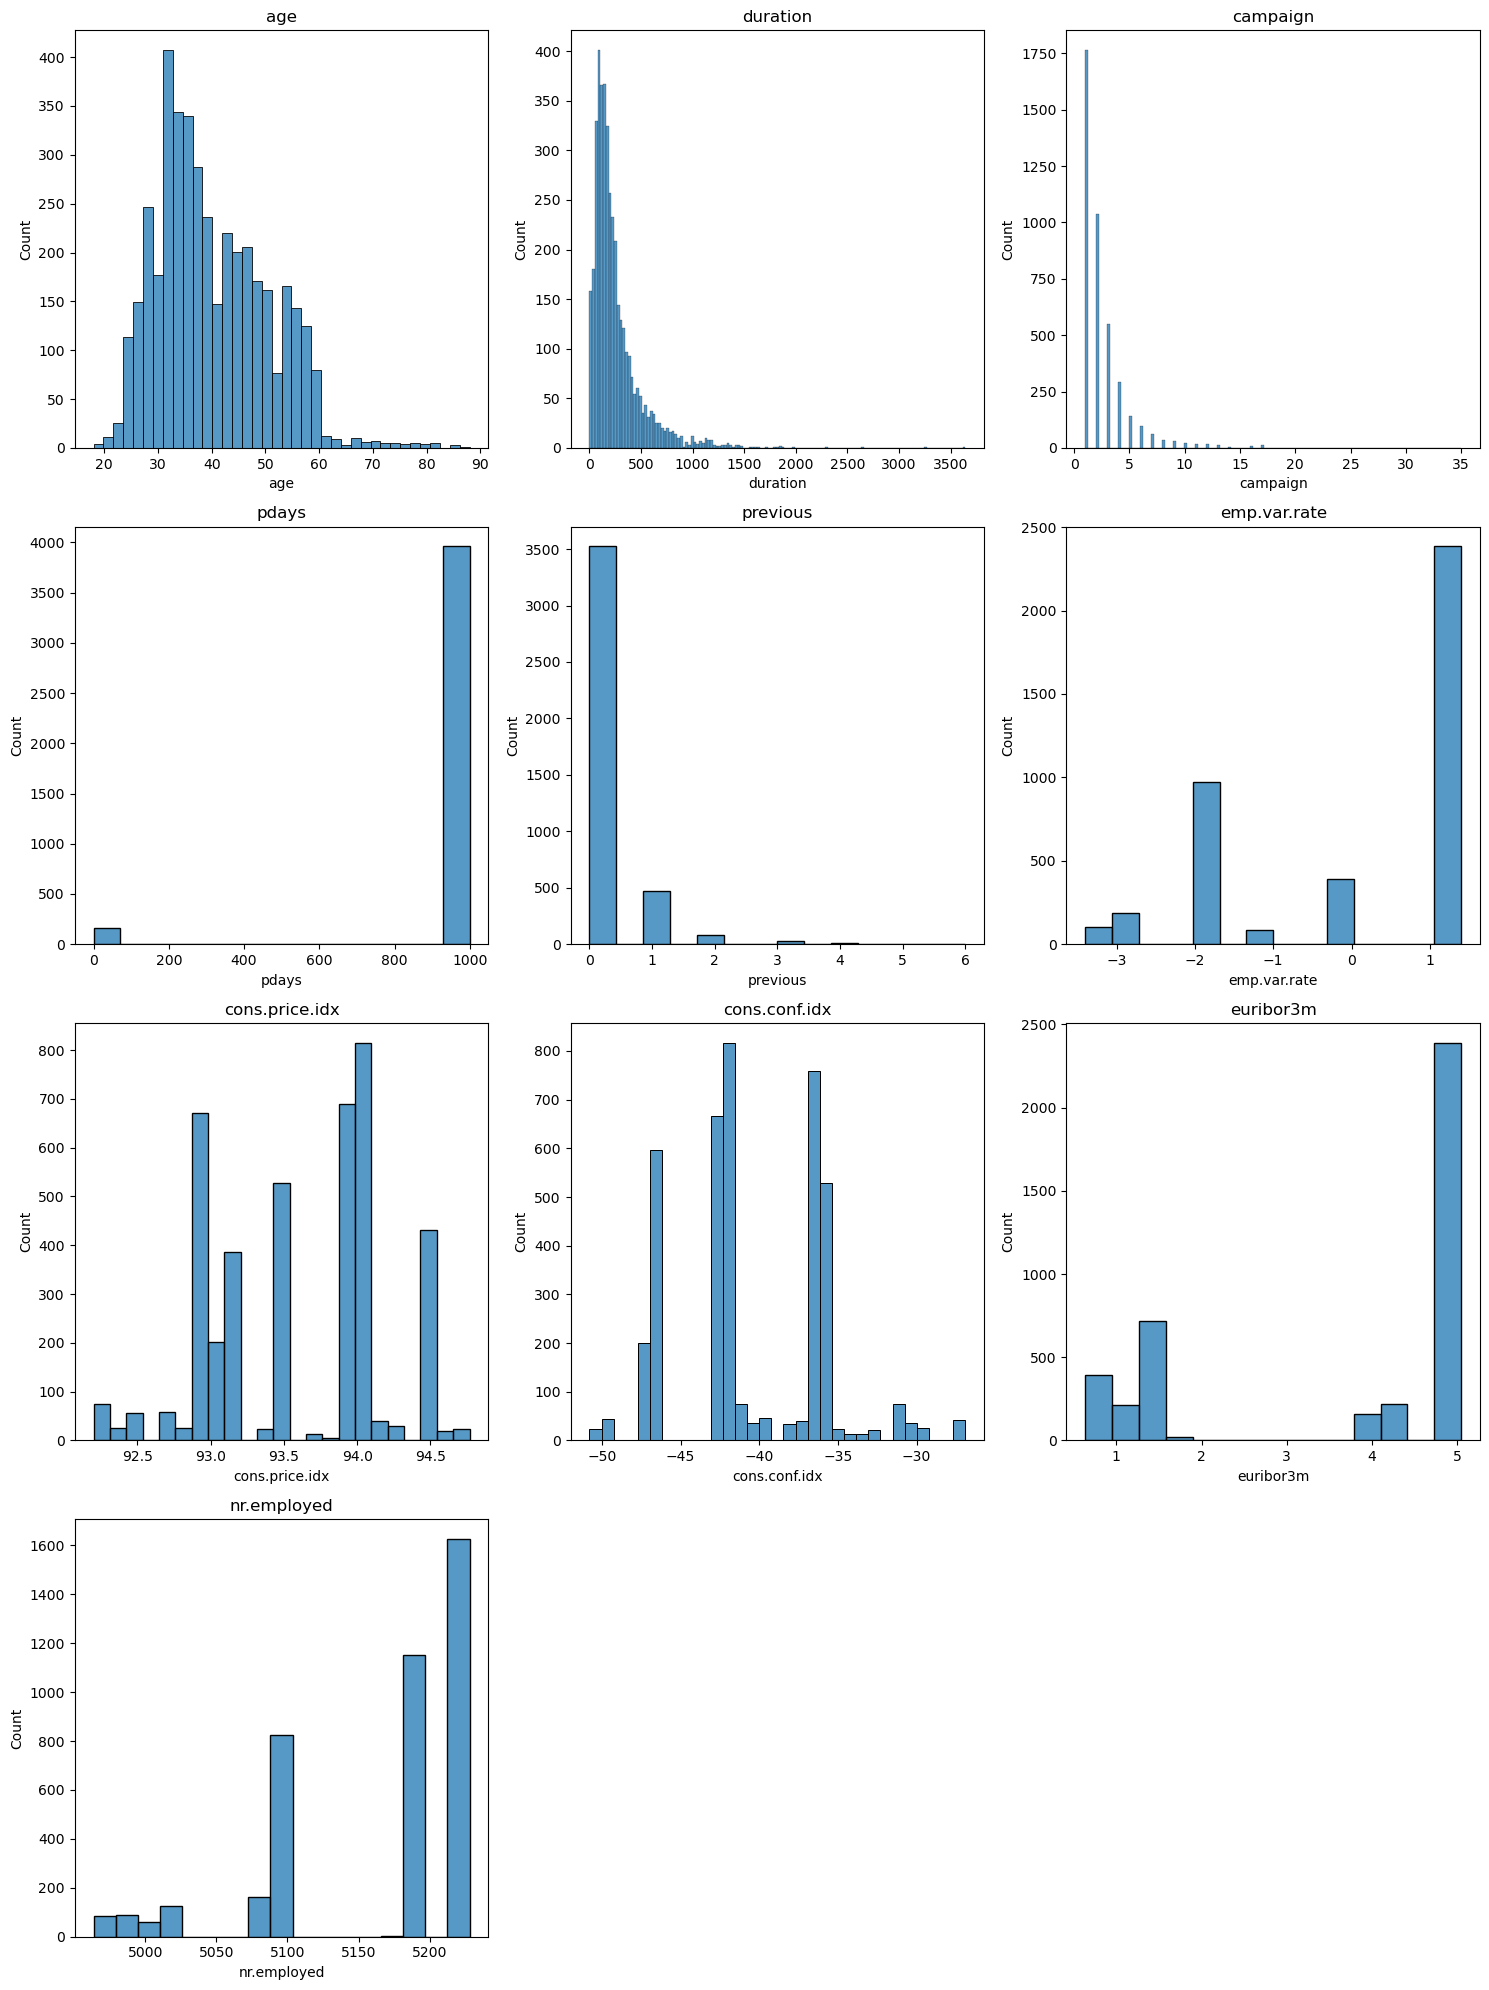

In [115]:
plt.figure(figsize=(15,20))
for i,j in enumerate(cols1,1):
    plt.subplot(4,3,i)
    sns.histplot(df[j])
    plt.title(j)

plt.tight_layout()    
plt.show()

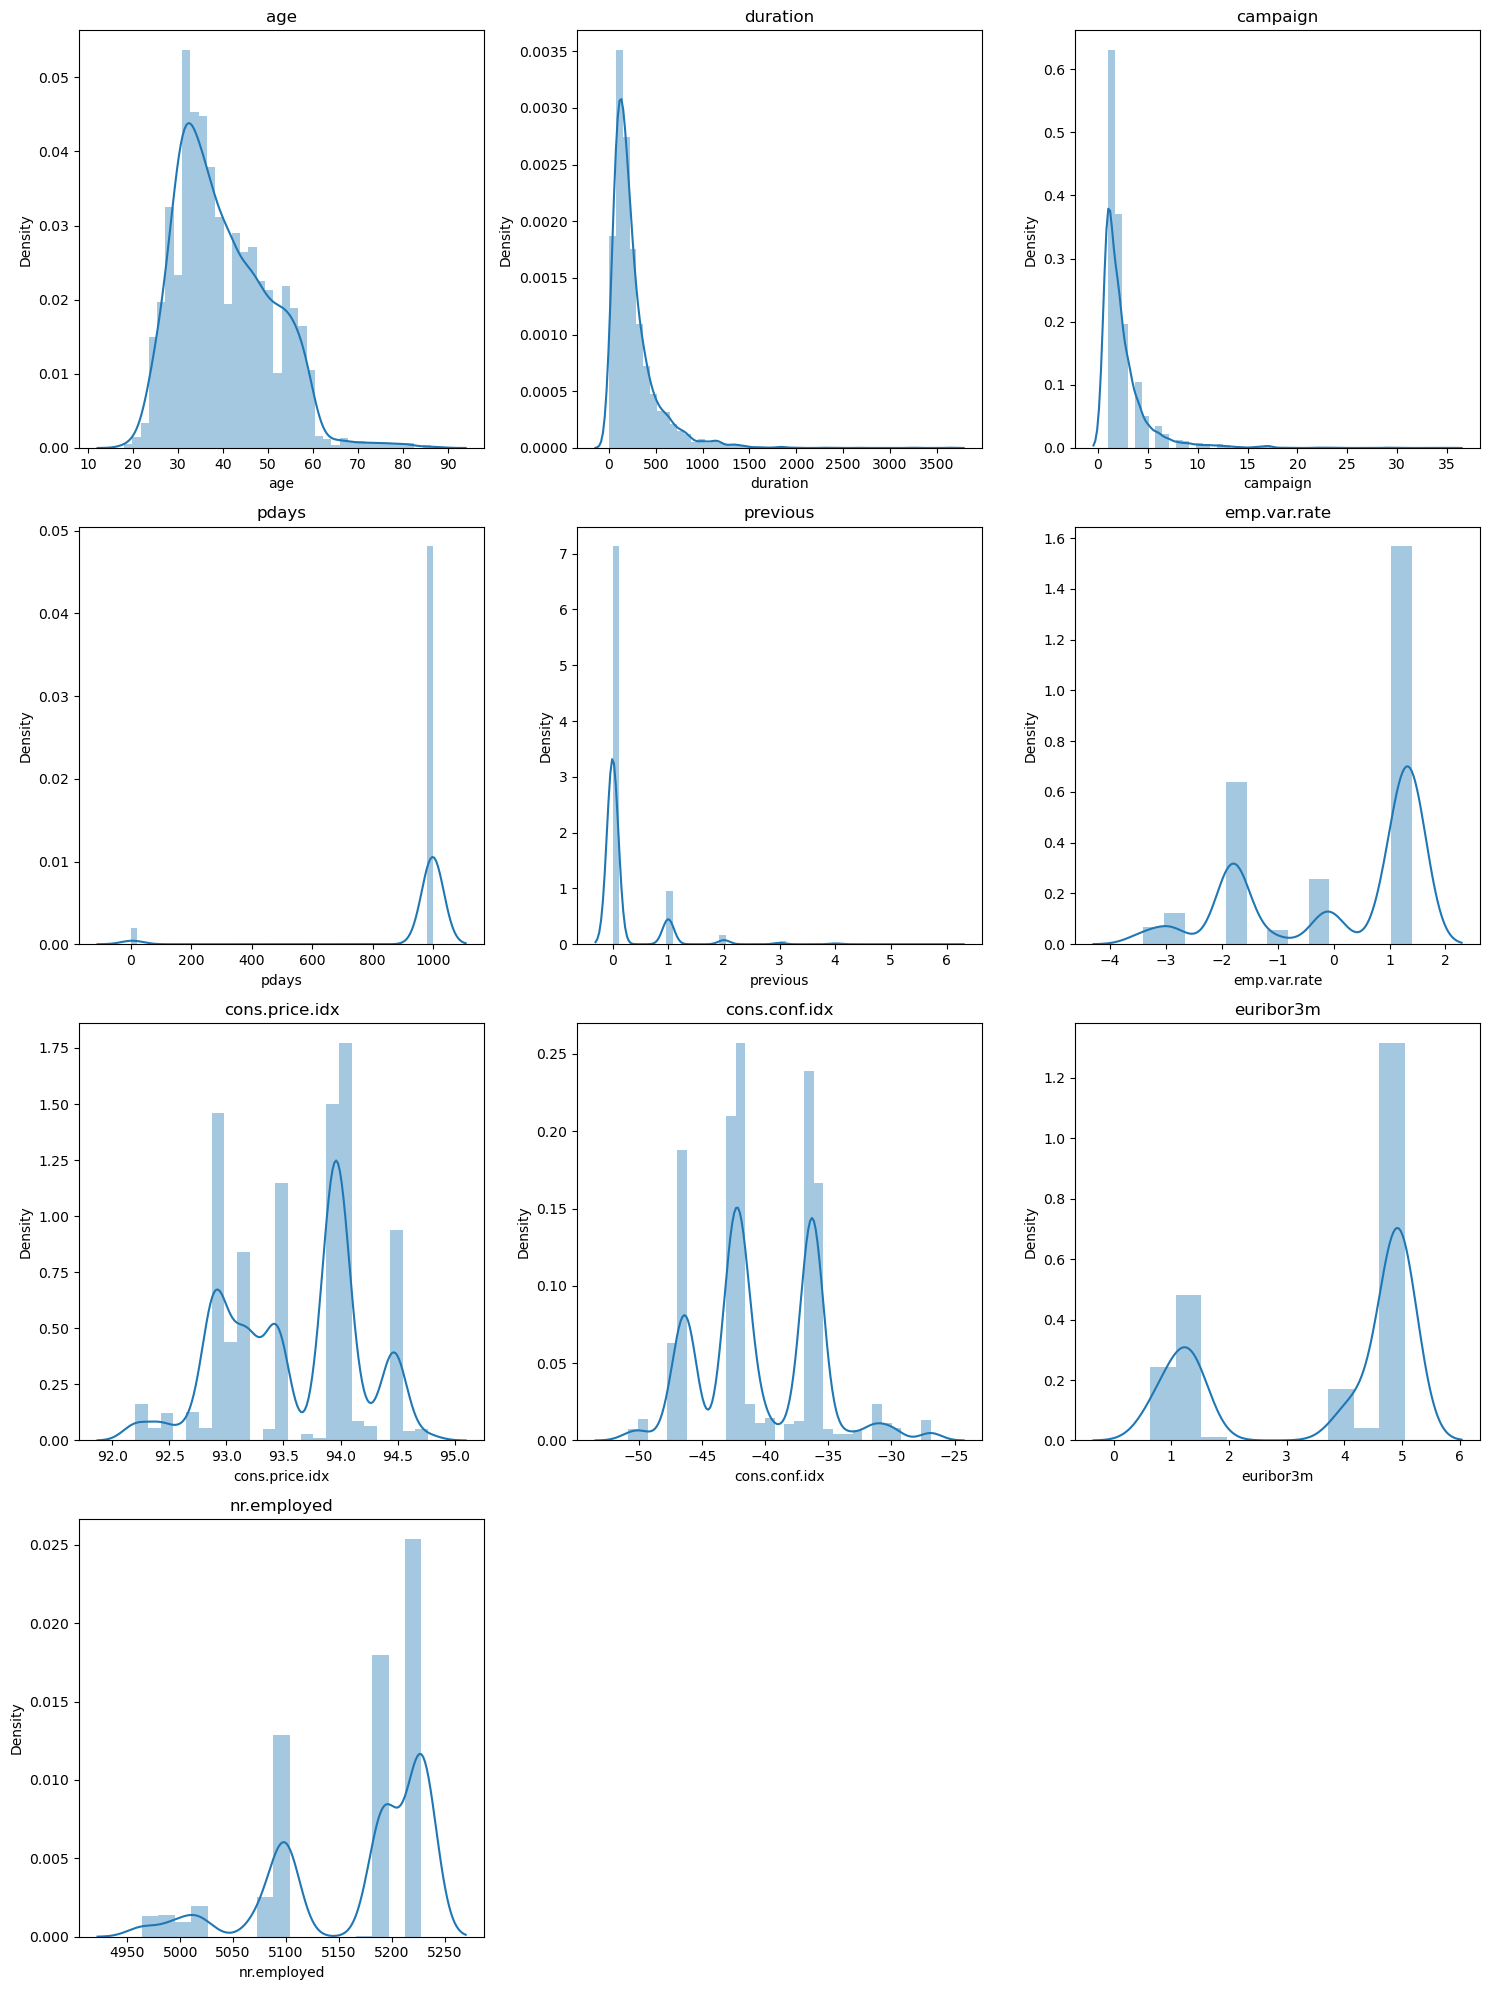

In [116]:

plt.figure(figsize=(15,20))
for i,j in enumerate(cols1,1):
    plt.subplot(4,3,i)
    sns.distplot(df[j])
    plt.title(j)
plt.tight_layout()    
plt.show()

In [117]:
for i in cols1:
    print(i,':',round(df[i].skew(),2))

age : 0.72
duration : 3.29
campaign : 4.0
pdays : -4.78
previous : 4.02
emp.var.rate : -0.73
cons.price.idx : -0.22
cons.conf.idx : 0.29
euribor3m : -0.72
nr.employed : -1.08


### Outlaire Analysis

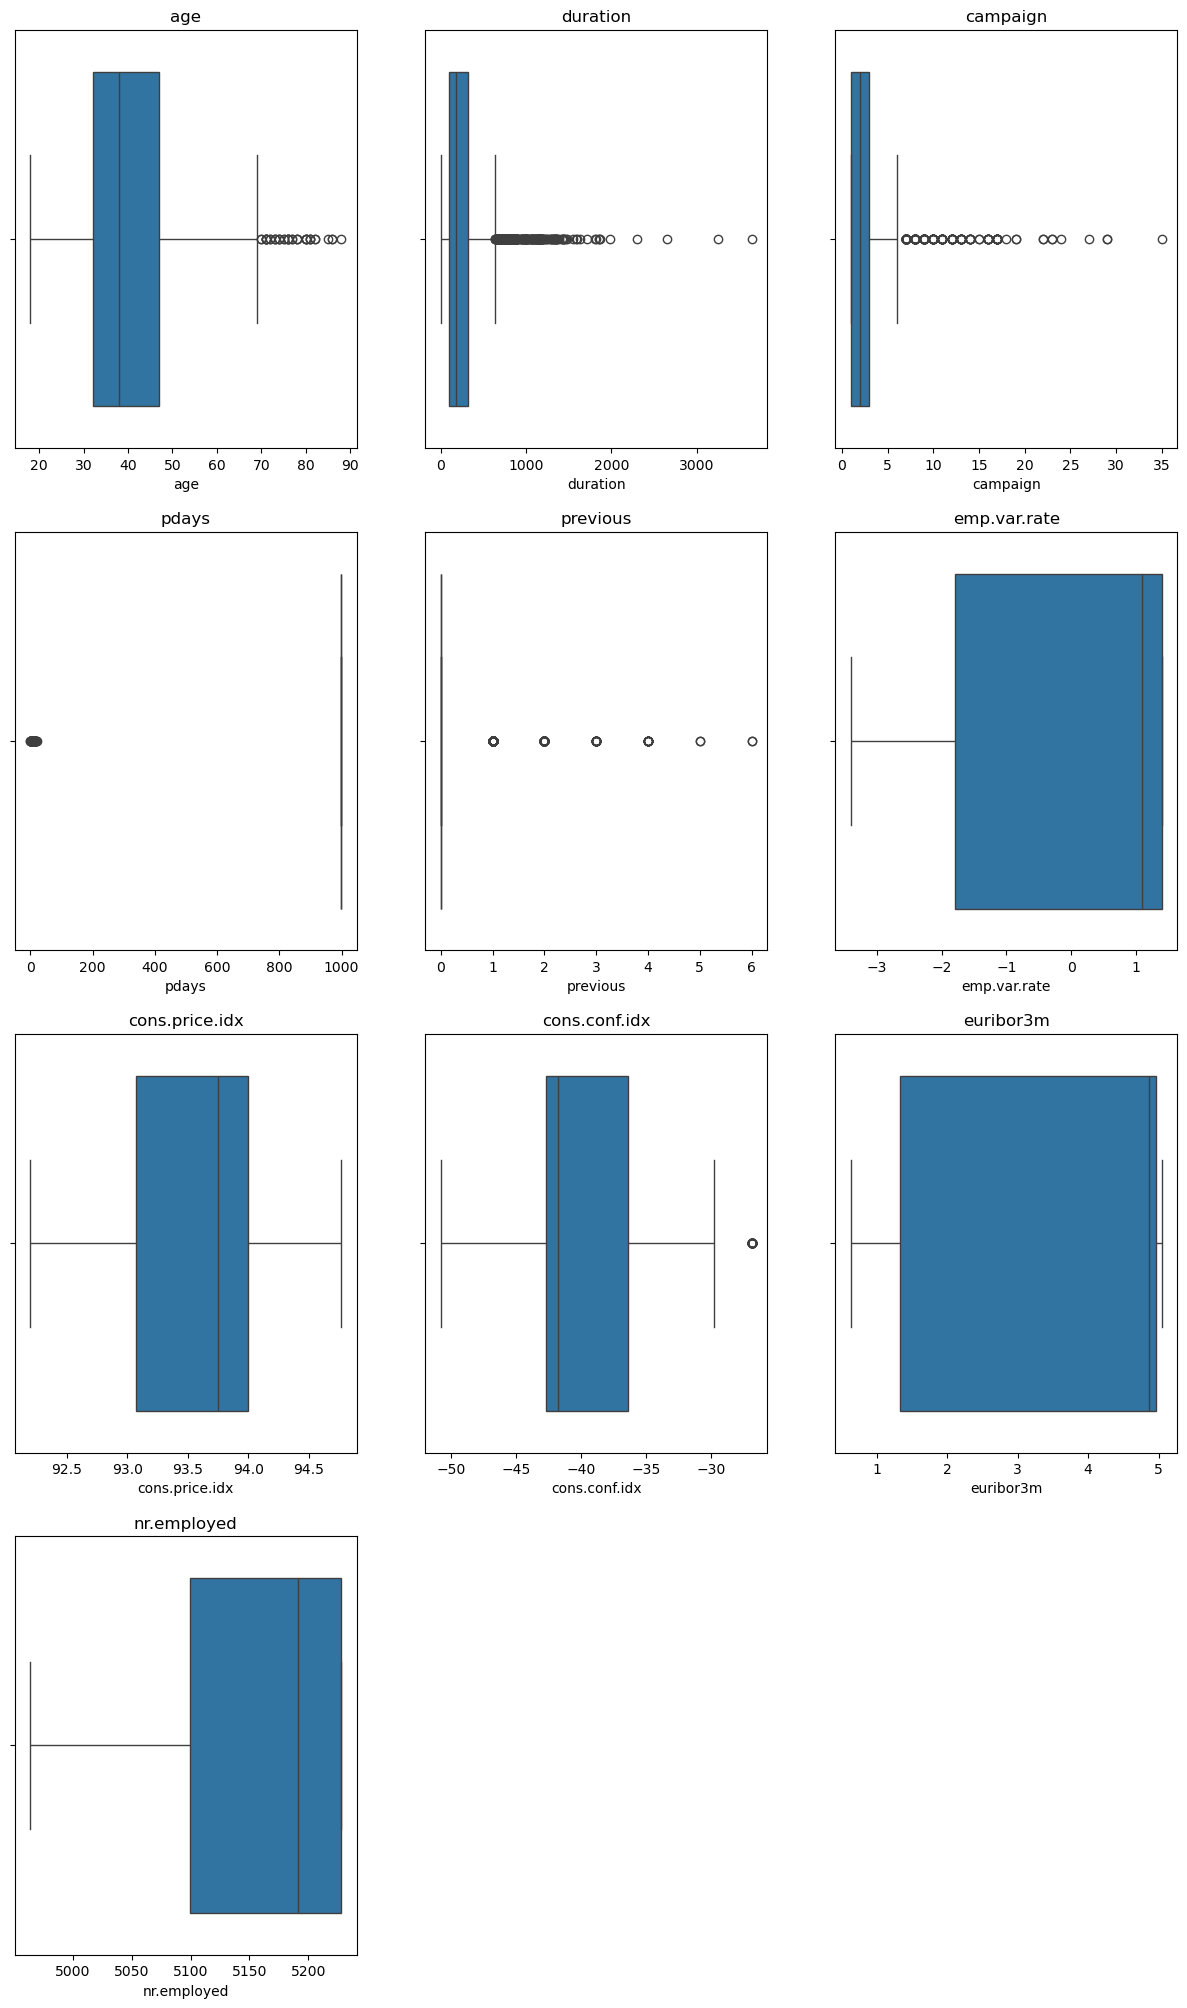

In [118]:
plt.figure(figsize=(15,25))
for i,j in enumerate(cols1,1):
    plt.subplot(4,3,i)
    sns.boxplot(df[j],orient='h')
    plt.title(j)
   
plt.show()

### Transformation of Data

### Identyfy outlairs and replace with median values

In [119]:
df_cpoy=df.copy()

for i in cols1:
    Q1=np.percentile(df[i],25)
    Q3=np.percentile(df[i],75)
    IQR=Q3-Q1
    lb=Q1-1.5*IQR
    ub=Q3+1.5*IQR
    con1=df[i]<lb
    con2=df[i]>ub
    outlier_data=df[con1 | con2]

    con=con1 | con2
    median=df[i].median()
    new_df=np.where(con,median,df[i])
    df_cpoy[i]=new_df
    

In [120]:
df_cpoy.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.0,4119.0,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,39.746540,201.982763,2.045885,999.0,0.0,0.084972,93.579704,-40.654649,3.621356,5166.481695
std,9.660751,135.155498,1.239852,0.0,0.0,1.563114,0.579349,4.378644,1.733591,73.667904
min,18.000000,0.000000,1.000000,999.0,0.0,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.0,0.0,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.0,0.0,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,262.000000,3.000000,999.0,0.0,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,69.000000,638.000000,6.000000,999.0,0.0,1.400000,94.767000,-29.800000,5.045000,5228.100000


In [121]:
cols2=df_cpoy.select_dtypes(exclude='object').columns
cols2

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [122]:
for i in cols2:
    befour=round(df[i].skew(),2)
    after=round(df_cpoy[i].skew(),2)
    print(i,' befour: ',befour,'after mean replace: ',after)

age  befour:  0.72 after mean replace:  0.44
duration  befour:  3.29 after mean replace:  1.1
campaign  befour:  4.0 after mean replace:  1.33
pdays  befour:  -4.78 after mean replace:  0.0
previous  befour:  4.02 after mean replace:  0.0
emp.var.rate  befour:  -0.73 after mean replace:  -0.73
cons.price.idx  befour:  -0.22 after mean replace:  -0.22
cons.conf.idx  befour:  0.29 after mean replace:  0.13
euribor3m  befour:  -0.72 after mean replace:  -0.72
nr.employed  befour:  -1.08 after mean replace:  -1.08


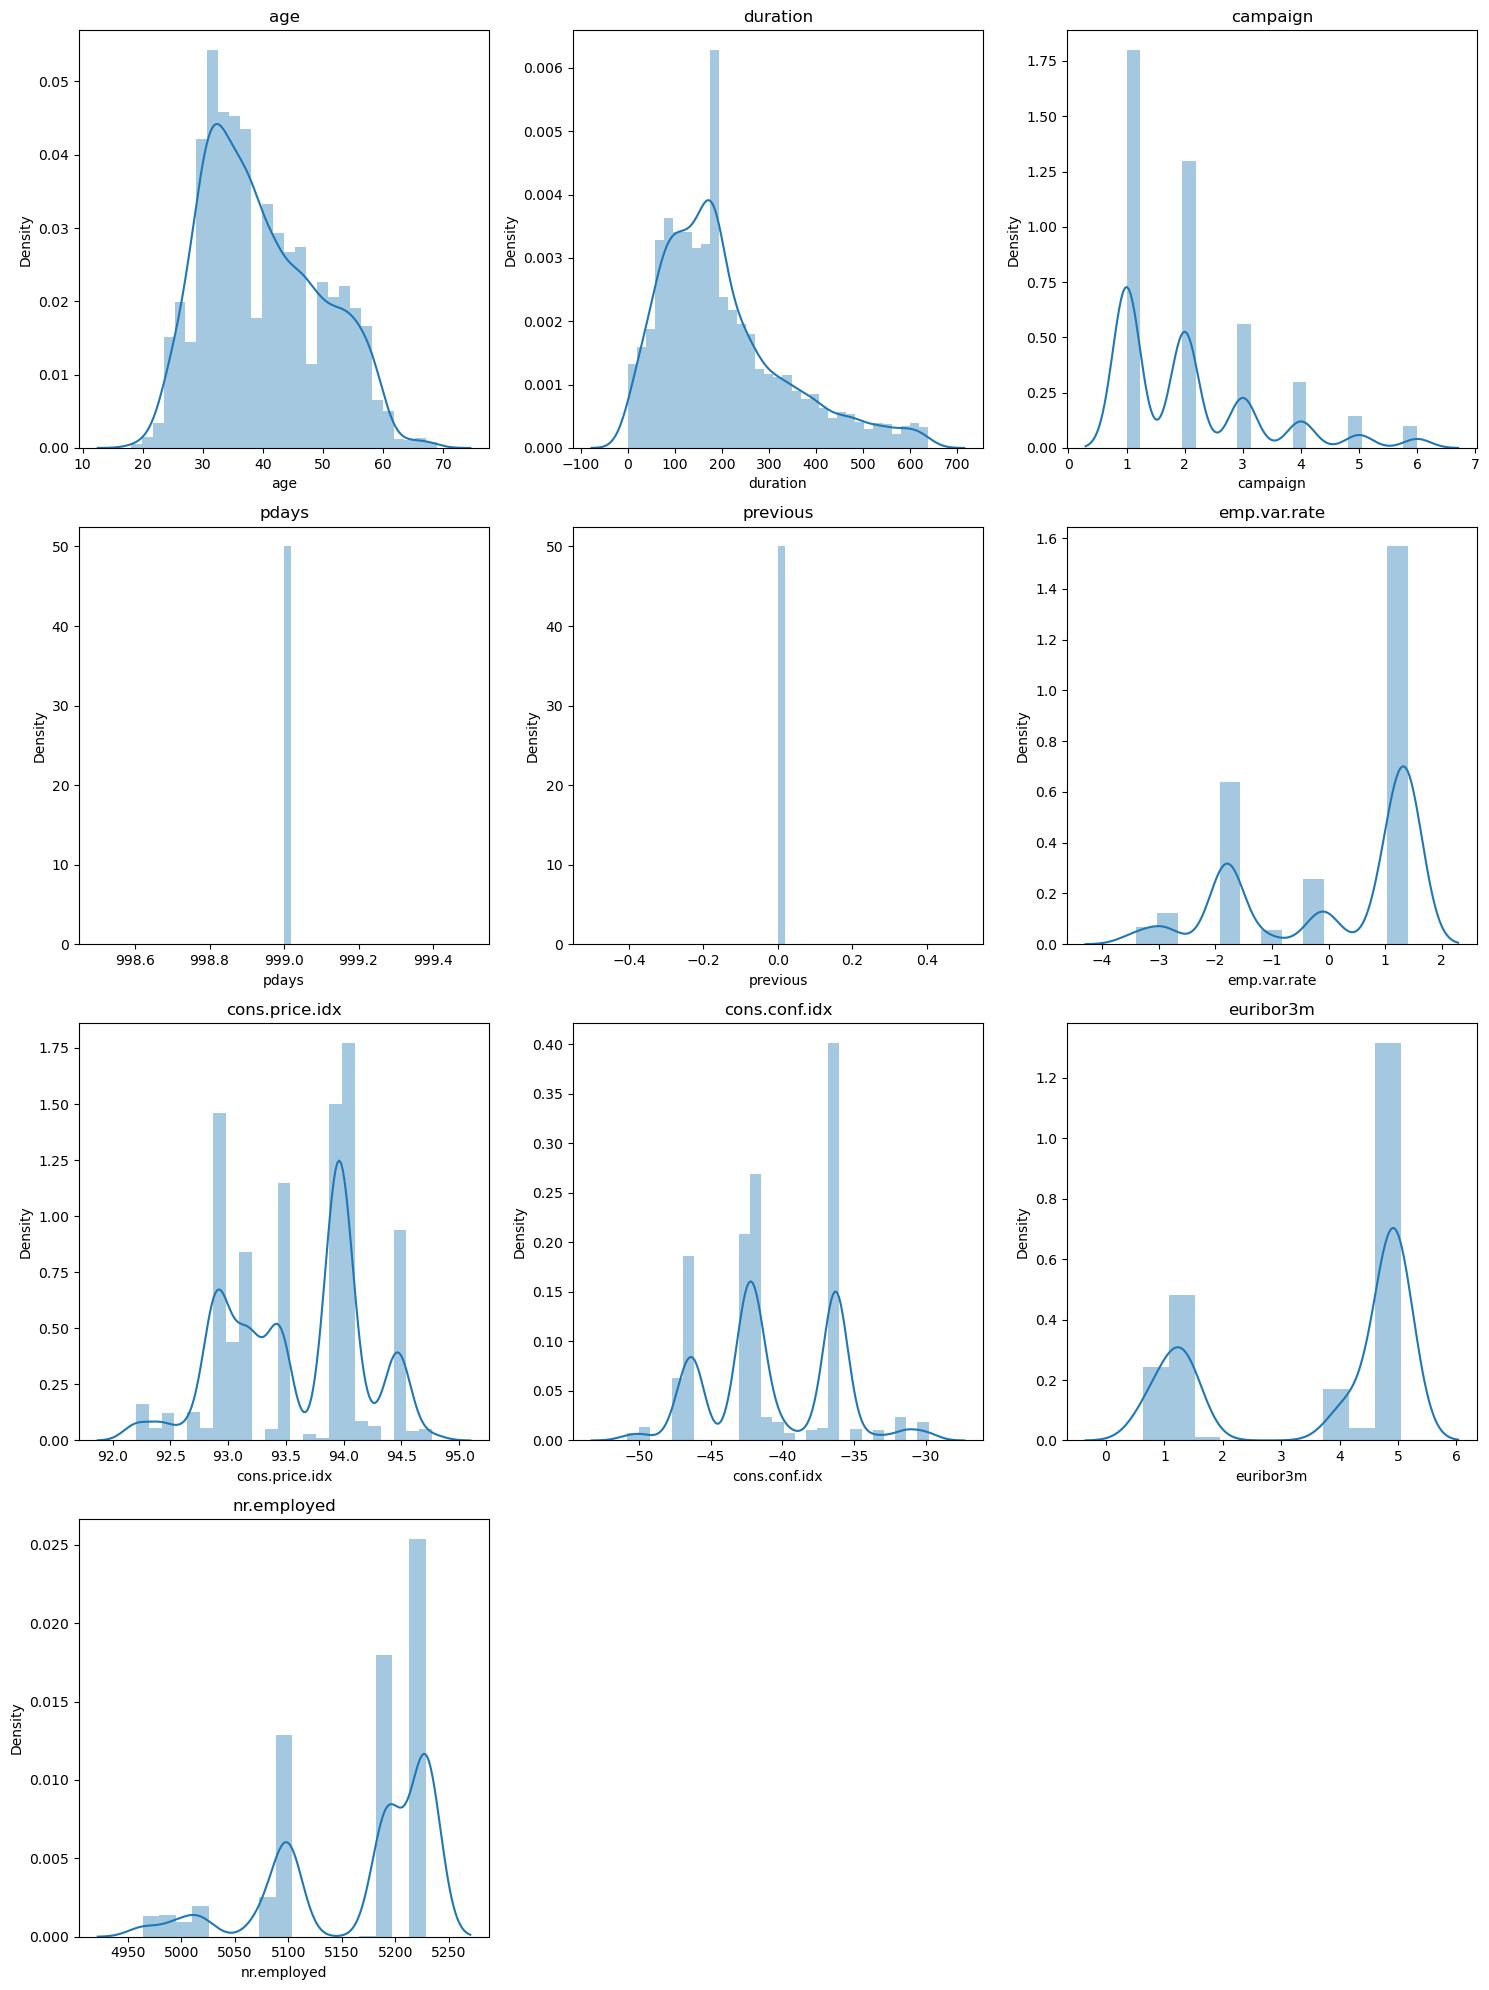

In [123]:
plt.figure(figsize=(15,20))
for i,j in enumerate(cols2,1):
    plt.subplot(4,3,i)
    sns.distplot(df_cpoy[j])
    plt.title(j)
plt.tight_layout()    
plt.show()

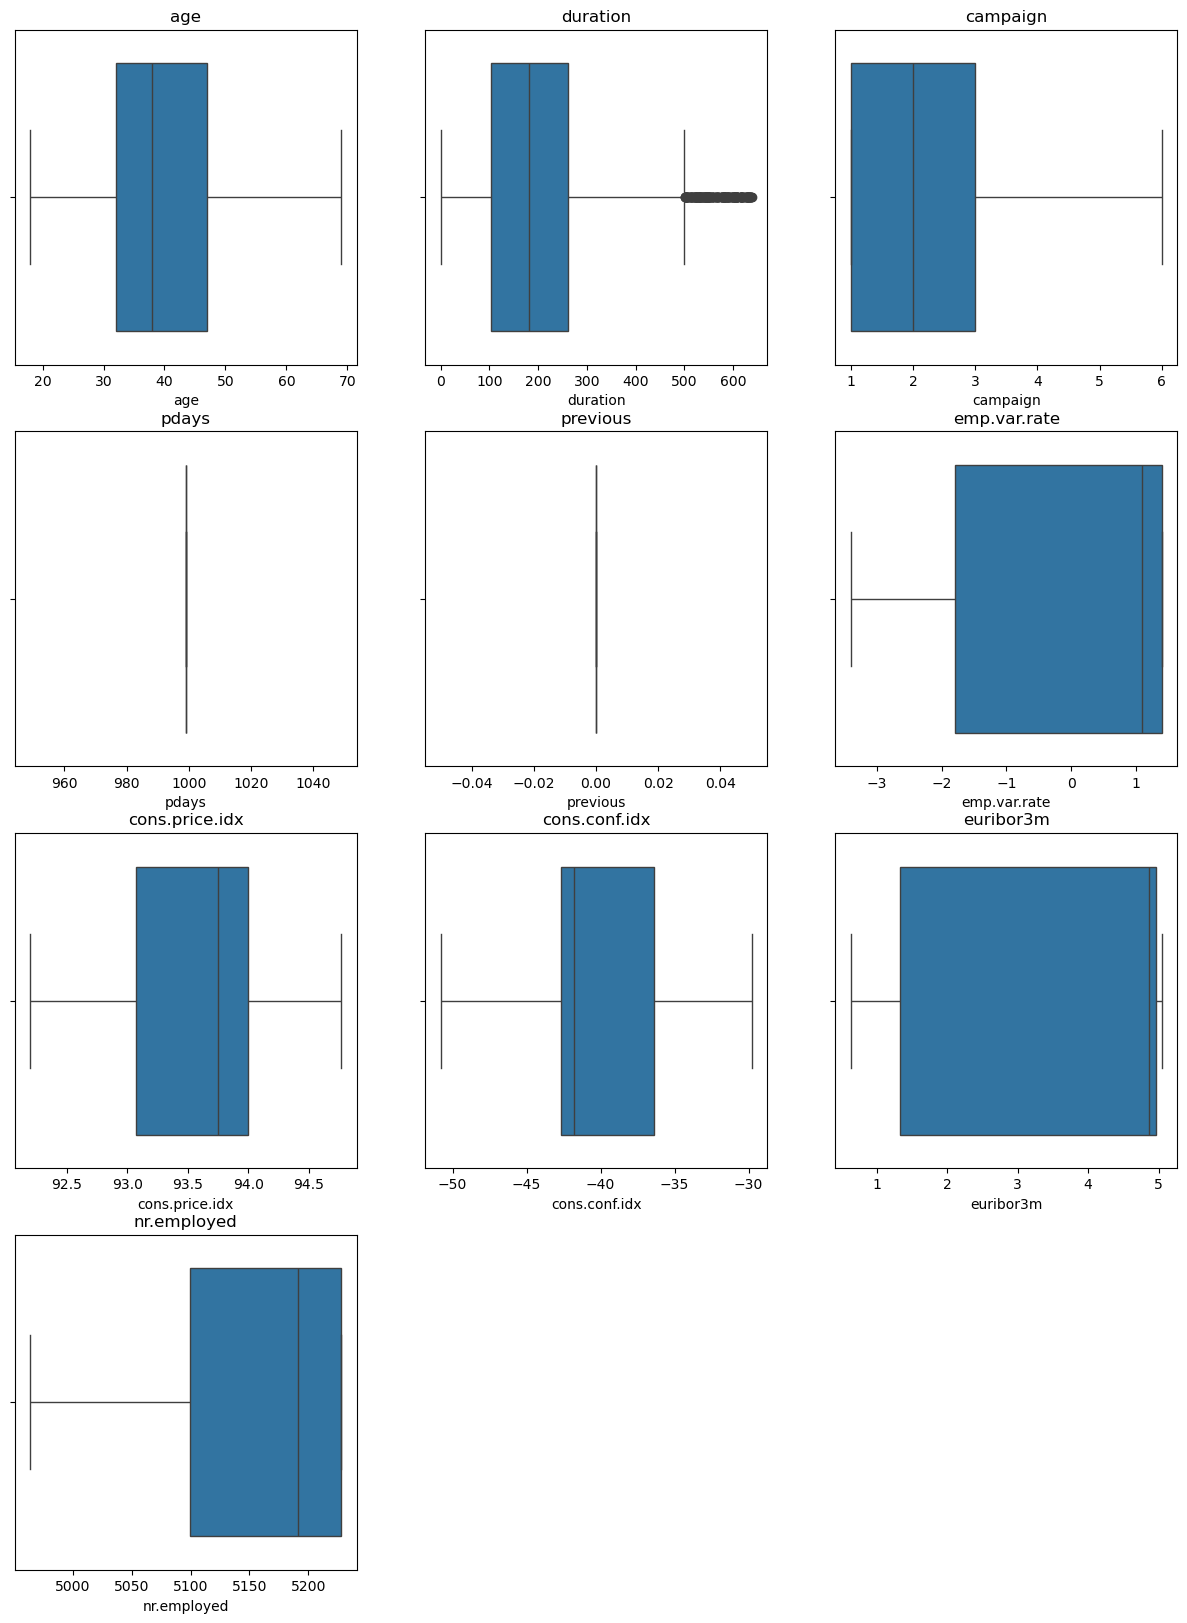

In [124]:
plt.figure(figsize=(15,20))
for i,j in enumerate(cols2,1):
    plt.subplot(4,3,i)
    sns.boxplot(df_cpoy[j],orient='h')
    plt.title(j)
   
plt.show()

### Log Transformation

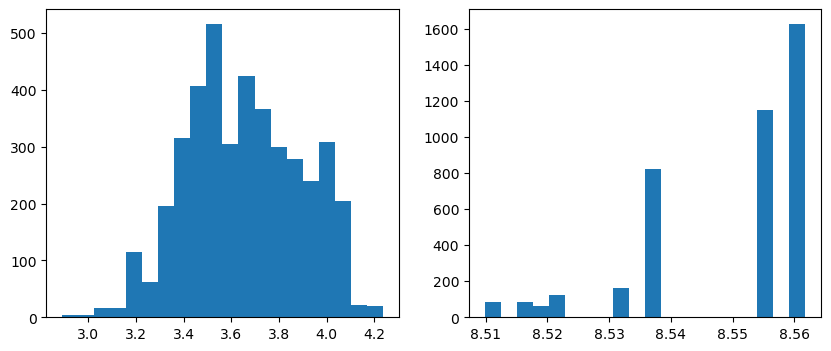

In [125]:
log_data=np.log(df_cpoy['age'])
log_data1=np.log(df_cpoy['nr.employed'])
plt.figure(figsize=(10,4))
plt.subplot(1,2,1).hist(log_data,bins=20,label='Logarithm')
plt.subplot(1,2,2).hist(log_data1,bins=20,label='Logarithm')
plt.show()

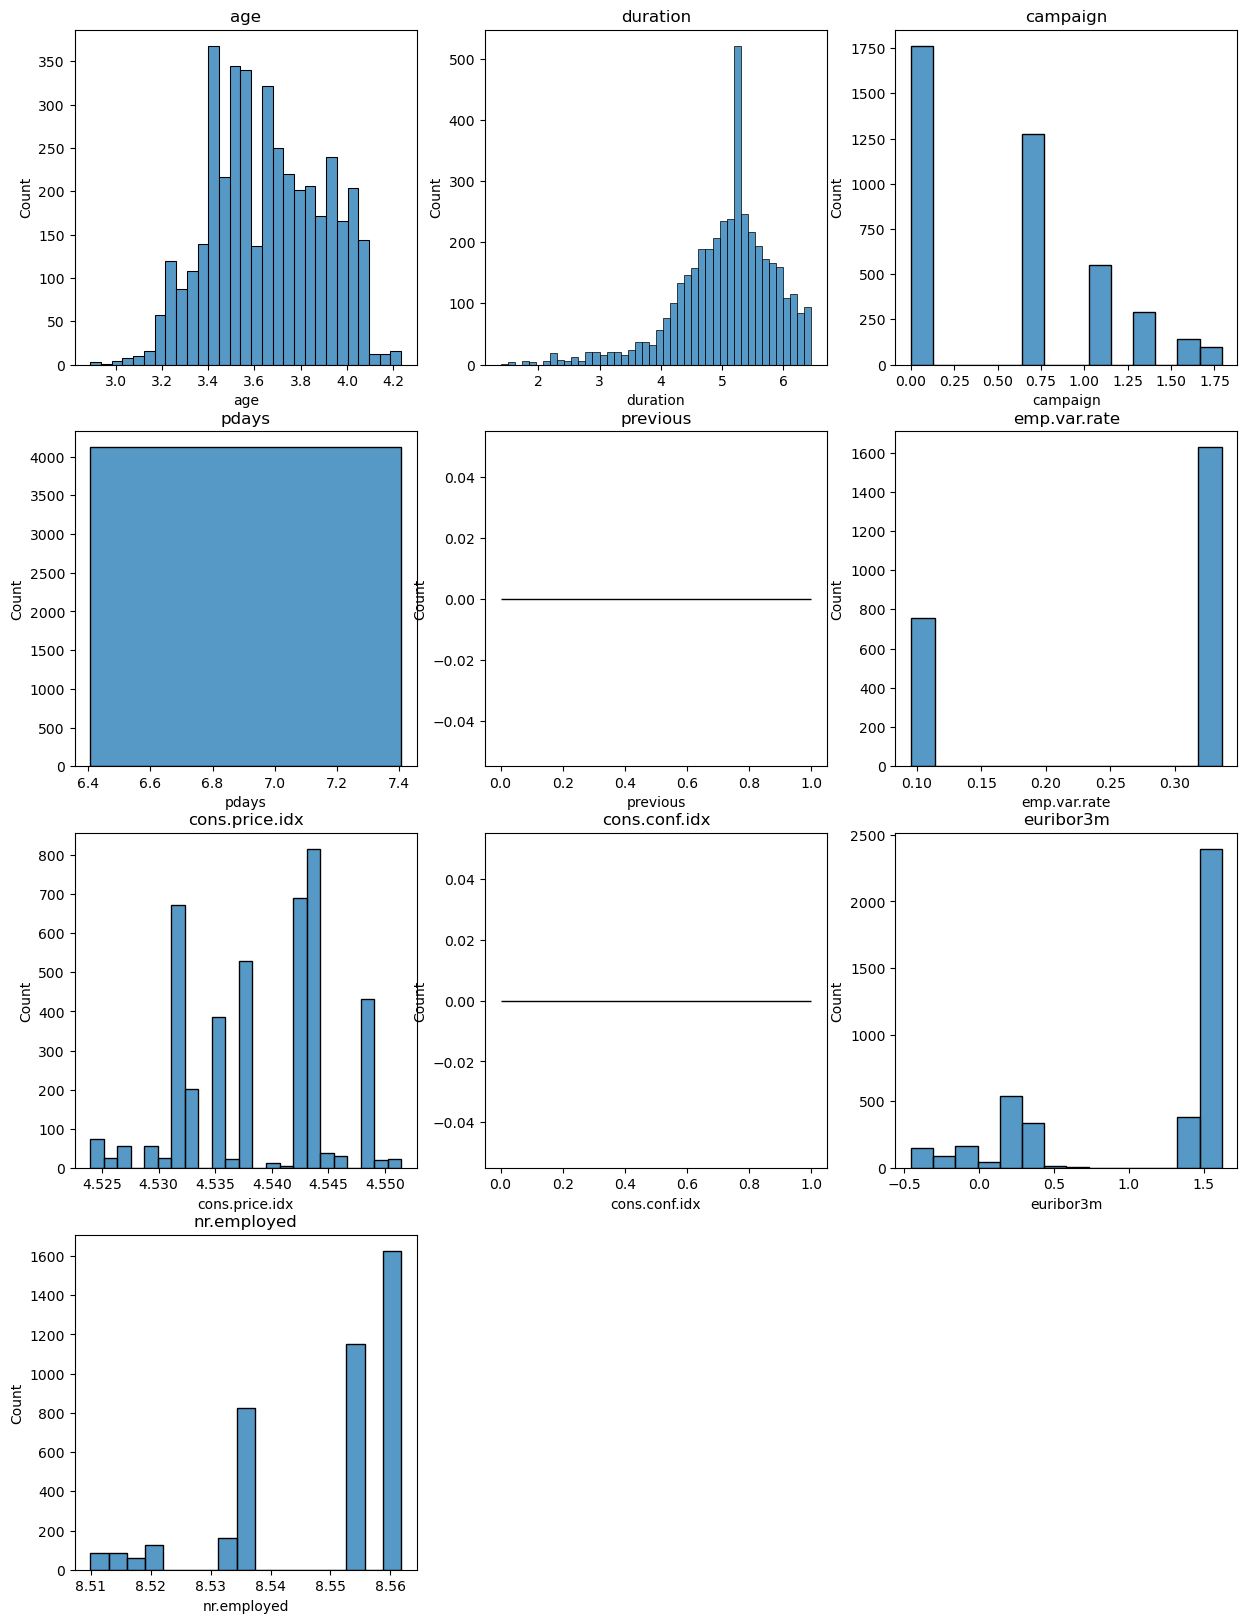

In [126]:
plt.figure(figsize=(15,20))
for i,j in enumerate(cols2,1):
    plt.subplot(4,3,i)
    df_sqar=np.log(df_cpoy[j])
    df_cpoy[j]=df_sqar 
    sns.histplot(df_sqar)
    plt.title(j)
plt.show()  


### Sqaure root transformation

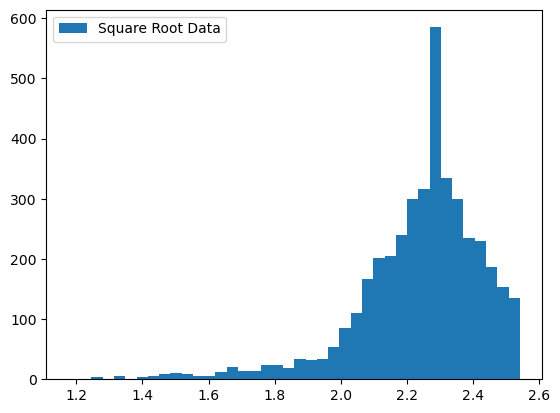

In [127]:
sqar_df=np.sqrt(df_cpoy['duration'])
plt.hist(sqar_df,bins=40,label="Square Root Data")
plt.legend()
plt.show()

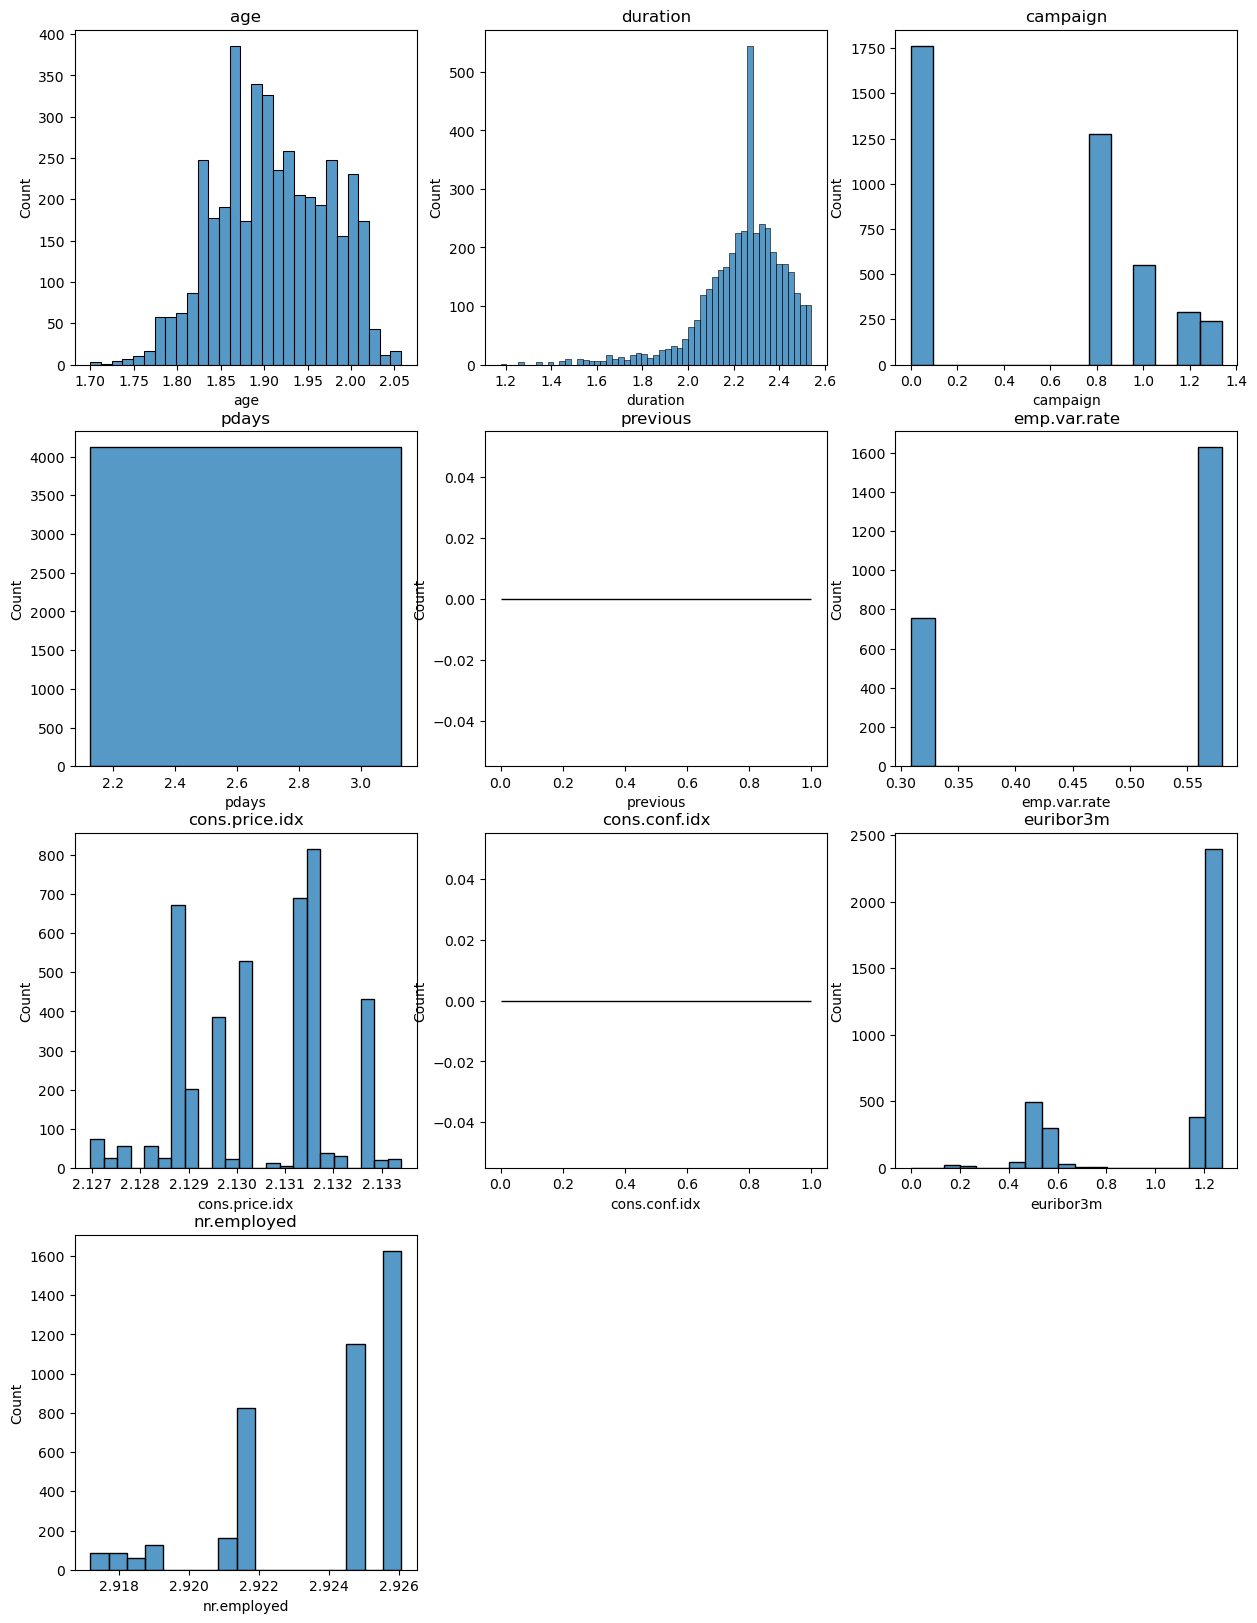

In [128]:
plt.figure(figsize=(15,20))
for i,j in enumerate(cols2,1):
    plt.subplot(4,3,i)
    df_sqar=np.sqrt(df_cpoy[j])
    df_cpoy[j]=df_sqar 
    sns.histplot(df_sqar)
    plt.title(j)

In [129]:
for i in cols2:
    before=round(df[i].skew(),2)
    after=round(df_cpoy[i].skew(),2)
    print(i,' before: ',before,'after sqrt transformation: ',after)

age  before:  0.72 after sqrt transformation:  -0.05
duration  before:  3.29 after sqrt transformation:  -1.45
campaign  before:  4.0 after sqrt transformation:  -0.08
pdays  before:  -4.78 after sqrt transformation:  0.0
previous  before:  4.02 after sqrt transformation:  nan
emp.var.rate  before:  -0.73 after sqrt transformation:  -0.78
cons.price.idx  before:  -0.22 after sqrt transformation:  -0.23
cons.conf.idx  before:  0.29 after sqrt transformation:  nan
euribor3m  before:  -0.72 after sqrt transformation:  -1.2
nr.employed  before:  -1.08 after sqrt transformation:  -1.1


### Power Transformation

In [130]:
cols1=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m']

### Boxcox and Yeo-johnson

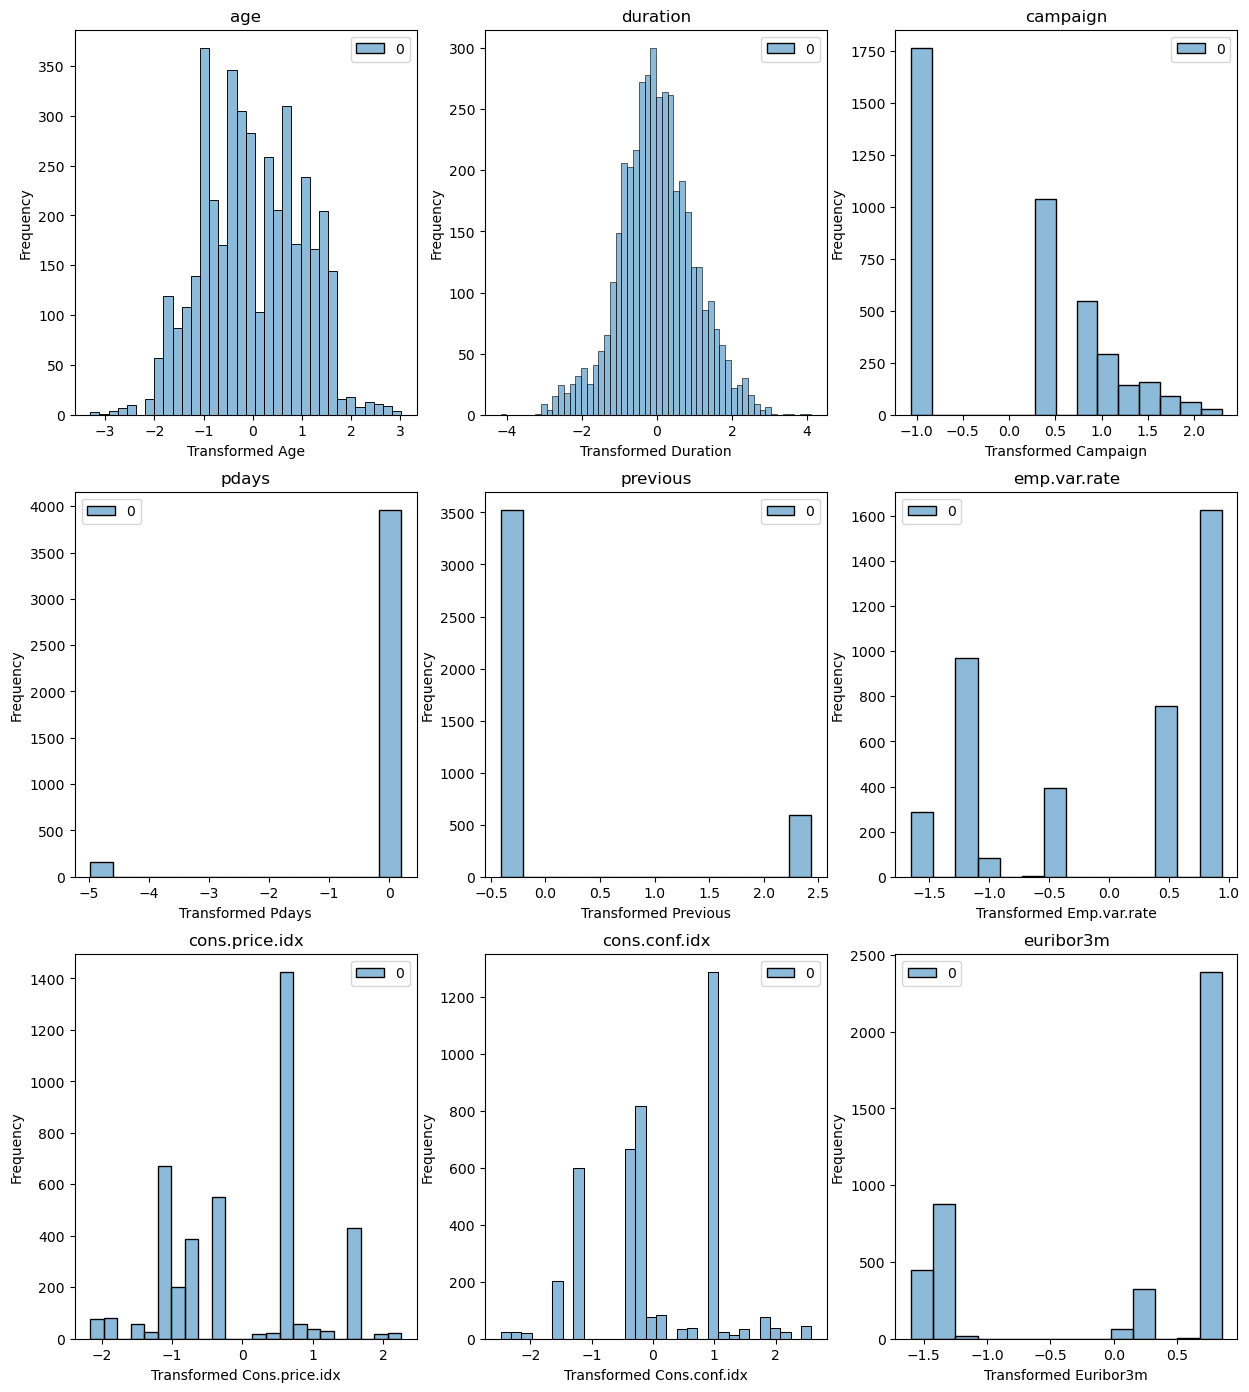

In [131]:
from sklearn.preprocessing import PowerTransformer

plt.figure(figsize=(15,23))
for i ,j in enumerate(cols1,1):
    plt.subplot(4,3,i)
    # Use 'yeo-johnson' method if the column contains non-positive values
    method = "box-cox" if (df[j] > 0).all() else "yeo-johnson"
    pe = PowerTransformer(method=method,standardize=True)
    yeo_tranform = pe.fit_transform(df[[j]])
    df[j] = yeo_tranform
    sns.histplot(yeo_tranform)
    plt.xlabel(f'Transformed {j.capitalize()}')
    plt.ylabel('Frequency')
    plt.title(j)

plt.show()

### Correlation

In [132]:
df_cpoy1=pd.read_csv(r"bank-additional.csv",sep=';')
df_cpoy1.corr(numeric_only=True)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000


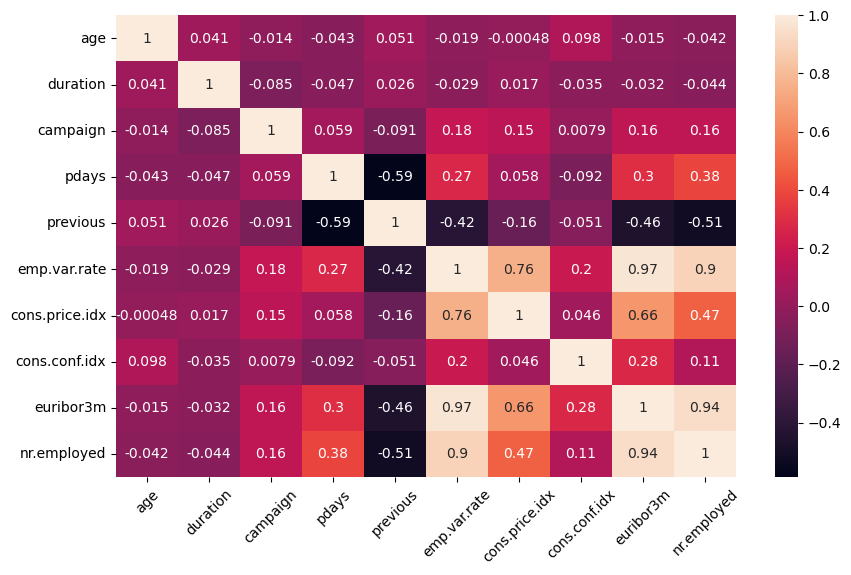

In [133]:
corr_df=df_cpoy1.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr_df,annot=corr_df)
plt.xticks(rotation=45)
plt.show()

## Encoding Methods

#### Map method

In [134]:
df=pd.read_csv(r"bank-additional.csv",sep=';')
cols=df.select_dtypes(include='object').columns

In [135]:
for i in cols:
    print(i,df[i].unique())

job ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
marital ['married' 'single' 'divorced' 'unknown']
education ['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']
default ['no' 'unknown' 'yes']
housing ['yes' 'no' 'unknown']
loan ['no' 'unknown' 'yes']
contact ['cellular' 'telephone']
month ['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
day_of_week ['fri' 'wed' 'mon' 'thu' 'tue']
poutcome ['nonexistent' 'failure' 'success']
y ['no' 'yes']


In [136]:
for i in cols:
    lebals=list(df[i].unique())
    values=[i for i in range(len(lebals))]
    d=dict(zip(lebals,values))
    df[i]=df[i].map(d)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,0,0,0,0,0,0,0,0,0,...,2,999,0,0,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,1,1,1,0,1,0,1,0,0,...,4,999,0,0,1.1,93.994,-36.4,4.855,5191.0,0
2,25,1,0,1,0,0,0,1,1,1,...,1,999,0,0,1.4,94.465,-41.8,4.962,5228.1,0
3,38,1,0,0,0,2,1,1,1,0,...,3,999,0,0,1.4,94.465,-41.8,4.959,5228.1,0
4,47,2,0,2,0,0,0,0,2,2,...,1,999,0,0,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,2,0,4,0,0,2,0,4,3,...,1,999,0,0,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,2,0,1,0,0,0,1,4,0,...,1,999,0,0,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,7,1,1,0,1,0,0,0,2,...,2,999,1,1,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,2,0,1,0,1,0,0,5,0,...,1,999,0,0,1.4,93.444,-36.1,4.966,5228.1,0


####  Label Encoder

In [137]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=pd.read_csv(r"bank-additional.csv",sep=';')
for i in cols:
    df[i]=le.fit_transform(df[i])

    print(df[i].values)
    print(le.inverse_transform(df[i]))
df

[1 7 7 ... 8 0 4]
['blue-collar' 'services' 'services' ... 'student' 'admin.' 'management']
[1 2 1 ... 2 1 2]
['married' 'single' 'married' ... 'single' 'married' 'single']
[2 3 3 ... 3 3 3]
['basic.9y' 'high.school' 'high.school' ... 'high.school' 'high.school'
 'high.school']
[0 0 0 ... 0 0 0]
['no' 'no' 'no' ... 'no' 'no' 'no']
[2 0 2 ... 0 0 2]
['yes' 'no' 'yes' ... 'no' 'no' 'yes']
[0 0 0 ... 0 0 0]
['no' 'no' 'no' ... 'no' 'no' 'no']
[0 1 1 ... 0 0 0]
['cellular' 'telephone' 'telephone' ... 'cellular' 'cellular' 'cellular']
[6 6 4 ... 6 1 7]
['may' 'may' 'jun' ... 'may' 'aug' 'nov']
[0 0 4 ... 1 0 4]
['fri' 'fri' 'wed' ... 'mon' 'fri' 'wed']
[1 1 1 ... 0 1 1]
['nonexistent' 'nonexistent' 'nonexistent' ... 'failure' 'nonexistent'
 'nonexistent']
[0 0 0 ... 0 0 0]
['no' 'no' 'no' ... 'no' 'no' 'no']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,3,2,...,1,999,0,1,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,0,1,3,0,2,0,1,3,0,...,1,999,0,1,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,8,2,3,0,0,0,0,6,1,...,2,999,1,0,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,0,1,3,0,0,0,0,1,0,...,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1,0


#### np.where

In [138]:
# np.where is only  for binary only 
# only y column y ['no' 'yes'] 
df=pd.read_csv(r"bank-additional.csv",sep=';')
con=df['y']=='no'
df['y']=np.where(con,0,1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0


#### One hot encoder

In [139]:
df=pd.read_csv(r"bank-additional.csv",sep=';')
pd.get_dummies(df,dtype='int')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,1,0,0,0,0,0,1,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,1,0,0,0,0,0,1,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,1,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,1,0,0,0,0,0,1,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,0,0,1,0,0,0,1,0,1,0
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,...,1,0,0,0,0,0,1,0,1,0
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,0,1,0,0,0,1,0,0,1,0
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,1,0,0,0,0,0,1,0,1,0


### Scaling methods

#### Z-Scalar

In [140]:
from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
df=pd.read_csv(r"bank-additional.csv",sep=';')
cols=df.select_dtypes(exclude='object').columns
for i in cols:
    df[i]=sl.fit_transform(df[[i]])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-0.980752,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,-0.209228,0.201031,-0.351356,nonexistent,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779,no
1,-0.107991,services,single,high.school,no,no,no,telephone,may,fri,...,0.569634,0.201031,-0.351356,nonexistent,0.649441,0.715193,0.892269,0.711698,0.332862,no
2,-1.465619,services,married,high.school,no,yes,no,telephone,jun,wed,...,-0.598660,0.201031,-0.351356,nonexistent,0.841389,1.528273,-0.283172,0.773427,0.836535,no
3,-0.204965,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,0.180203,0.201031,-0.351356,nonexistent,0.841389,1.528273,-0.283172,0.771697,0.836535,no
4,0.667795,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,-0.598660,0.201031,-0.351356,nonexistent,-0.118350,-0.655478,-0.326707,0.328632,0.398028,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,-0.980752,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,-0.598660,0.201031,-0.351356,nonexistent,0.841389,0.583995,-0.479079,0.771120,0.836535,no
4115,-0.107991,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,-0.598660,0.201031,-0.351356,nonexistent,0.841389,0.583995,-0.479079,0.771697,0.836535,no
4116,-1.271672,student,single,high.school,no,no,no,cellular,may,mon,...,-0.209228,0.201031,1.494607,failure,-1.206054,-1.185448,-1.240939,-1.308054,-0.914779,no
4117,1.734503,admin.,married,high.school,no,no,no,cellular,aug,fri,...,-0.598660,0.201031,-0.351356,nonexistent,0.841389,-0.234264,0.957571,0.775735,0.836535,no


#### Min-Max Scaling

In [141]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
df=pd.read_csv(r"bank-additional.csv",sep=';')
for i in cols:
    df[i]=mn.fit_transform(df[[i]])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.171429,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,0.029412,1.0,0.000000,nonexistent,0.333333,0.269680,0.192469,0.153741,0.512287,no
1,0.300000,services,single,high.school,no,no,no,telephone,may,fri,...,0.088235,1.0,0.000000,nonexistent,0.937500,0.698753,0.602510,0.956916,0.859735,no
2,0.100000,services,married,high.school,no,yes,no,telephone,jun,wed,...,0.000000,1.0,0.000000,nonexistent,1.000000,0.882307,0.376569,0.981179,1.000000,no
3,0.285714,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,0.058824,1.0,0.000000,nonexistent,1.000000,0.882307,0.376569,0.980499,1.000000,no
4,0.414286,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,0.000000,1.0,0.000000,nonexistent,0.687500,0.389322,0.368201,0.806349,0.877883,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0.171429,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,0.000000,1.0,0.000000,nonexistent,1.000000,0.669135,0.338912,0.980272,1.000000,no
4115,0.300000,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,0.000000,1.0,0.000000,nonexistent,1.000000,0.669135,0.338912,0.980499,1.000000,no
4116,0.128571,student,single,high.school,no,no,no,cellular,may,mon,...,0.029412,1.0,0.166667,failure,0.333333,0.269680,0.192469,0.163039,0.512287,no
4117,0.571429,admin.,married,high.school,no,no,no,cellular,aug,fri,...,0.000000,1.0,0.000000,nonexistent,1.000000,0.484412,0.615063,0.982086,1.000000,no
